Environment: Python 2.7.11 and Jupyter notebook

Libraries used::
 - pandas #for using dataframes
 - json # to deal with json data
 - json_normalize # to normalize json data
 - pprint # to beautify json
 - datetime # manipulating dates 
 - sklearn.linear_model LinearRegression # for using linear regression to predict values
 - seaborn #to create visualizations
 - numpy # manipulation of dataframes and maths functions
 - sys # checking python version
 - matplotlib.pyplot #visualizations
 
## Introduction
#### This notebook involves cleaning data of property sales records in order to get it ready for analysis of prices and it is broken into 2 tasks: Task 1 and Task 2.

### Importing all required lbiraries</b>

In [3]:
import pandas as pd #for using dataframes
import json # to deal with json data
from pandas.io.json import json_normalize # to normalize json data
from pprint import pprint # to beautify json
import datetime # for manipulating dates in dataframe
from sklearn.linear_model import LinearRegression # for using linear regression to predict values
import seaborn as sns #to create visualizations
import numpy as np # manipulation of dataframes and maths functions
import sys # checking python version
import matplotlib.pyplot as plt #visualizations

In [4]:
# check python version to be 2.7
print (sys.version)

2.7.13 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]


In [5]:
#Changing displayable rows to see more data for analysis.
pd.options.display.max_rows = 200

# Task 1: 
## Parsing the property sales data stored in “data.dat” and preparing it for Task 2

### Investigating the data file 

On opening the file in a text editor, we can observe that it contains json formatted data. So we will attempt to load the data 
in python now.

In [6]:
# Opening file and using json library to parse it. 

with open('data.dat') as data_file:    
    data = json.load(data_file)
pprint(data)

{u'houses': [{u'address': u'18810 Densmore Ave N, Shoreline, WA 98133, USA',
              u'area': {u'sqft_above': 1340,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1340\\ 7912'},
              u'condition': 3,
              u'date': u'20140502T000000',
              u'floors': 1.5,
              u'price': 313000.0,
              u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1955,
              u'yr_renovated': nan},
             {u'address': u'709 W Blaine St, Seattle, WA 98119, USA',
              u'area': {u'sqft_above': 3370,
                        u'sqft_basement': 280,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3650\\ 9050'},
              u'condition': 5,
              u'date': u'20140502T000000',
              u'floors': 2.0,
              u'price': 2384000.0,
              u'

              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2003,
              u'yr_renovated': nan},
             {u'address': u'18915 SE 42nd Pl, Issaquah, WA 98027, USA',
              u'area': {u'sqft_above': 1210,
                        u'sqft_basement': 780,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1990\\ 7712'},
              u'condition': 3,
              u'date': u'20140505T000000',
              u'floors': 1.0,
              u'price': 627000.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1973,
              u'yr_renovated': nan},
             {u'address': u'1765 267th Ct SE, Sammamish, WA 98075, USA',
              u'area': {u'sqft_above': 3690,
                        u'sqft_basement': 0,
                        u'sqft_living/s

              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1977,
              u'yr_renovated': nan},
             {u'address': u'24201 SE 1st Pl, Sammamish, WA 98074, USA',
              u'area': {u'sqft_above': 3030,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3030\\ 7864'},
              u'condition': 3,
              u'date': u'20140506T000000',
              u'floors': 2.0,
              u'price': 685000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1999,
              u'yr_renovated': nan},
             {u'address': u'13714 Ashworth Ave N, Seattle, WA 98133, USA',
              u'area': {u'sqft_above': 1310,
                        u'sqft_basement': 0,
                        u'sqft_living/s

             {u'address': u'2145 Condon Way W, Seattle, WA 98199, USA',
              u'area': {u'sqft_above': 980,
                        u'sqft_basement': 780,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1760\\ 6428'},
              u'condition': 4,
              u'date': u'20140507T000000',
              u'floors': 1.0,
              u'price': 690000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1942,
              u'yr_renovated': nan},
             {u'address': u'605 N 178th St, Shoreline, WA 98133, USA',
              u'area': {u'sqft_above': 1660,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1660\\ 8307'},
              u'condition': 4,
              u'date': u'20140507T000000',
              u'floors': 1.0,
              u'price': 405000.0,
              u'rooms'

              u'waterfront': 0,
              u'yr_built': 2001,
              u'yr_renovated': nan},
             {u'address': u'3026 S Star Lake Rd, Auburn, WA 98001, USA',
              u'area': {u'sqft_above': 1200,
                        u'sqft_basement': 800,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2000\\ 13300'},
              u'condition': 4,
              u'date': u'20140509T000000',
              u'floors': 1.0,
              u'price': 290000.0,
              u'rooms': u'Number of bedrooms: 4; Number of bathrooms: 2.5',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1968,
              u'yr_renovated': nan},
             {u'address': u'3502 Morris Ave S, Renton, WA 98055, USA',
              u'area': {u'sqft_above': 1380,
                        u'sqft_basement': 750,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2130\\ 8078'},
              u'condition': 4,
              u'date':

              u'price': 289000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1981,
              u'yr_renovated': nan},
             {u'address': u'25523 123rd Pl SE, Kent, WA 98030, USA',
              u'area': {u'sqft_above': 3001,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3001\\ 5710'},
              u'condition': 3,
              u'date': u'20140513T000000',
              u'floors': 2.0,
              u'price': 373000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 5',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2006,
              u'yr_renovated': nan},
             {u'address': u'7349 24th Ave NW, Seattle, WA 98117, USA',
              u'area': {u'sqft_above': 2450,
                        u'sqft_basement': 0,
             

              u'price': 715000.0,
              u'rooms': u'Number of bedrooms: 4; Number of bathrooms: 2.25',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1941,
              u'yr_renovated': nan},
             {u'address': u'14235 160th Ave NE, Woodinville, WA 98072, USA',
              u'area': {u'sqft_above': 4470,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4470\\ 60373'},
              u'condition': 3,
              u'date': u'20140514T000000',
              u'floors': 2.0,
              u'price': 1120000.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1988,
              u'yr_renovated': nan},
             {u'address': u'2000 NE 113th St, Seattle, WA 98125, USA',
              u'area': {u'sqft_above': 1060,
                        u'sqft_basement': 600,

              u'area': {u'sqft_above': 1120,
                        u'sqft_basement': 740,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1860\\ 7000'},
              u'condition': 3,
              u'date': u'20140516T000000',
              u'floors': 1.0,
              u'price': 239900.0,
              u'rooms': u'Number of bedrooms: 4; Number of bathrooms: 2.25',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1979,
              u'yr_renovated': nan},
             {u'address': u'11123 NE 141st Pl, Kirkland, WA 98034, USA',
              u'area': {u'sqft_above': 1290,
                        u'sqft_basement': 980,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2270\\ 7800'},
              u'condition': 3,
              u'date': u'20140516T000000',
              u'floors': 1.0,
              u'price': 446000.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
           

              u'area': {u'sqft_above': 1640,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1640\\ 7200'},
              u'condition': 4,
              u'date': u'20140519T000000',
              u'floors': 2.0,
              u'price': 350000.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1985,
              u'yr_renovated': nan},
             {u'address': u'16336 131st Ave SE, Renton, WA 98058, USA',
              u'area': {u'sqft_above': 1650,
                        u'sqft_basement': 660,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2310\\ 8045'},
              u'condition': 4,
              u'date': u'20140519T000000',
              u'floors': 1.0,
              u'price': 319950.0,
              u'rooms': u'Number of bathrooms: 1.75; Number of bedrooms: 4',
              

              u'floors': 1.0,
              u'price': 259000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1957,
              u'yr_renovated': nan},
             {u'address': u'10599 Marine View Dr SW, Seattle, WA 98146, USA',
              u'area': {u'sqft_above': 1830,
                        u'sqft_basement': 1670,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3500\\ 13875'},
              u'condition': 4,
              u'date': u'20140520T000000',
              u'floors': 1.0,
              u'price': 879950.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
              u'view': 4,
              u'waterfront': 0,
              u'yr_built': 1938,
              u'yr_renovated': nan},
             {u'address': u'352 17th Ave, Seattle, WA 98122, USA',
              u'area': {u'sqft_above': 2800,
                  

                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1660\\ 4800'},
              u'condition': 3,
              u'date': u'20140522T000000',
              u'floors': 2.0,
              u'price': 926300.0,
              u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1907,
              u'yr_renovated': nan},
             {u'address': u'547 NE 81st St, Seattle, WA 98115, USA',
              u'area': {u'sqft_above': 1040,
                        u'sqft_basement': 610,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1650\\ 5100'},
              u'condition': 5,
              u'date': u'20140522T000000',
              u'floors': 1.0,
              u'price': 600000.0,
              u'rooms': u'Number of bathrooms: 1.75; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
     

              u'yr_renovated': nan},
             {u'address': u'749 Mountain View Pl SW, Issaquah, WA 98027, USA',
              u'area': {u'sqft_above': 1280,
                        u'sqft_basement': 1280,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2560\\ 10400'},
              u'condition': 4,
              u'date': u'20140523T000000',
              u'floors': 1.0,
              u'price': 440000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1965,
              u'yr_renovated': nan},
             {u'address': u'6617 Beveridge Pl SW, Seattle, WA 98136, USA',
              u'area': {u'sqft_above': 1120,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1120\\ 5500'},
              u'condition': 4,
              u'date': u'20140523T000000',
              u'floors': 1.5,
     

              u'area': {u'sqft_above': 3330,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3330\\ 7399'},
              u'condition': 3,
              u'date': u'20140527T000000',
              u'floors': 2.0,
              u'price': 760000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2009,
              u'yr_renovated': nan},
             {u'address': u'6402-6412 105th Ave NE, Kirkland, WA 98033, USA',
              u'area': {u'sqft_above': 4590,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4590\\ 14685'},
              u'condition': 3,
              u'date': u'20140527T000000',
              u'floors': 2.0,
              u'price': 1710000.0,
              u'rooms': u'Number of bathrooms: 4.5; Number of bedrooms: 5',
          

              u'area': {u'sqft_above': 1270,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1270\\ 11600'},
              u'condition': 4,
              u'date': u'20140529T000000',
              u'floors': 1.0,
              u'price': 246500.0,
              u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1964,
              u'yr_renovated': nan},
             {u'address': u'17018 124th Ave SE, Renton, WA 98058, USA',
              u'area': {u'sqft_above': 950,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=950\\ 7560'},
              u'condition': 3,
              u'date': u'20140529T000000',
              u'floors': 1.0,
              u'price': 230000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 2',
              u'vie

              u'area': {u'sqft_above': 960,
                        u'sqft_basement': 800,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1760\\ 5000'},
              u'condition': 5,
              u'date': u'20140602T000000',
              u'floors': 1.0,
              u'price': 629000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1920,
              u'yr_renovated': nan},
             {u'address': u'6215 30th Ave NW, Seattle, WA 98107, USA',
              u'area': {u'sqft_above': 730,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=730\\ 3000'},
              u'condition': 3,
              u'date': u'20140602T000000',
              u'floors': 1.0,
              u'price': 395000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 1',
              u'view

                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2620\\ 9873'},
              u'condition': 3,
              u'date': u'20140603T000000',
              u'floors': 2.0,
              u'price': 600000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1987,
              u'yr_renovated': nan},
             {u'address': u'15105 262nd Ave SE, Issaquah, WA 98027, USA',
              u'area': {u'sqft_above': 2430,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2430\\ 54059'},
              u'condition': 3,
              u'date': u'20140603T000000',
              u'floors': 2.0,
              u'price': 770000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1987,
              

              u'yr_renovated': nan},
             {u'address': u'25510 SE 159th St, Issaquah, WA 98027, USA',
              u'area': {u'sqft_above': 2500,
                        u'sqft_basement': 2110,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4610\\ 40202'},
              u'condition': 4,
              u'date': u'20140605T000000',
              u'floors': 1.0,
              u'price': 630000.0,
              u'rooms': u'Number of bathrooms: 3.75; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1980,
              u'yr_renovated': nan},
             {u'address': u'21212 Occidental Ave S, Des Moines, WA 98198, USA',
              u'area': {u'sqft_above': 2440,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2440\\ 15349'},
              u'condition': 4,
              u'date': u'20140605T000000',
              u'floors': 2.0,
    

                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=780\\ 5000'},
              u'condition': 4,
              u'date': u'20140606T000000',
              u'floors': 1.0,
              u'price': 285000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 2',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1943,
              u'yr_renovated': nan},
             {u'address': u'830 Davis Pl S, Seattle, WA 98144, USA',
              u'area': {u'sqft_above': 980,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=980\\ 5000'},
              u'condition': 3,
              u'date': u'20140606T000000',
              u'floors': 1.0,
              u'price': 435000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1940,
              u'yr_reno

              u'yr_renovated': nan},
             {u'address': u'6008 14th Ave NW, Seattle, WA 98107, USA',
              u'area': {u'sqft_above': 1240,
                        u'sqft_basement': 260,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1500\\ 1249'},
              u'condition': 3,
              u'date': u'20140609T000000',
              u'floors': 2.0,
              u'price': 489000.0,
              u'rooms': u'Number of bathrooms: 3.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2004,
              u'yr_renovated': nan},
             {u'address': u'1706 251st Pl SE, Sammamish, WA 98075, USA',
              u'area': {u'sqft_above': 1900,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1900\\ 6224'},
              u'condition': 3,
              u'date': u'20140609T000000',
              u'floors': 2.0,
              u'p

              u'yr_built': 1962,
              u'yr_renovated': nan},
             {u'address': u'24134 SE 20th St, Sammamish, WA 98075, USA',
              u'area': {u'sqft_above': 1990,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1990\\ 3984'},
              u'condition': 3,
              u'date': u'20140611T000000',
              u'floors': 2.0,
              u'price': 560200.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2004,
              u'yr_renovated': nan},
             {u'address': u'10102 33rd Ave SW, Seattle, WA 98146, USA',
              u'area': {u'sqft_above': 1050,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1050\\ 6300'},
              u'condition': 3,
              u'date': u'20140611T000000',
              u

              u'condition': 4,
              u'date': u'20140612T000000',
              u'floors': 2.0,
              u'price': 835000.0,
              u'rooms': u'Number of bathrooms: 3.0; Number of bedrooms: 3',
              u'view': 4,
              u'waterfront': 1,
              u'yr_built': 1977,
              u'yr_renovated': nan},
             {u'address': u'3907 48th Ave NE, Seattle, WA 98105, USA',
              u'area': {u'sqft_above': 3000,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3000\\ 7500'},
              u'condition': 3,
              u'date': u'20140612T000000',
              u'floors': 2.0,
              u'price': 1688000.0,
              u'rooms': u'Number of bedrooms: 4; Number of bathrooms: 2.5',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1937,
              u'yr_renovated': 1994.0},
             {u'address': u'633 N 138th St, Seattle, WA 98133, U

              u'floors': 1.0,
              u'price': 304000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1967,
              u'yr_renovated': nan},
             {u'address': u'3405 35th Ave S, Seattle, WA 98144, USA',
              u'area': {u'sqft_above': 870,
                        u'sqft_basement': 820,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1690\\ 4080'},
              u'condition': 4,
              u'date': u'20140616T000000',
              u'floors': 1.0,
              u'price': 385000.0,
              u'rooms': u'Number of bathrooms: 1.75; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1984,
              u'yr_renovated': nan},
             {u'address': u'7502 15th Ave NE, Seattle, WA 98115, USA',
              u'area': {u'sqft_above': 1000,
                        u

              u'yr_renovated': nan},
             {u'address': u'8264 154th Ave SE, Newcastle, WA 98059, USA',
              u'area': {u'sqft_above': 4170,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4170\\ 9748'},
              u'condition': 3,
              u'date': u'20140617T000000',
              u'floors': 2.0,
              u'price': 1200000.0,
              u'rooms': u'Number of bathrooms: 3.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2004,
              u'yr_renovated': nan},
             {u'address': u'2050 14th Ave W, Seattle, WA 98119, USA',
              u'area': {u'sqft_above': 1180,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1180\\ 1262'},
              u'condition': 3,
              u'date': u'20140617T000000',
              u'floors': 3.0,
              u'pr

                        u'sqft_basement': 500,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1670\\ 7700'},
              u'condition': 3,
              u'date': u'20140618T000000',
              u'floors': 1.0,
              u'price': 424000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1972,
              u'yr_renovated': nan},
             {u'address': u'3617 48th Ave SW, Seattle, WA 98116, USA',
              u'area': {u'sqft_above': 950,
                        u'sqft_basement': 100,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1050\\ 6150'},
              u'condition': 4,
              u'date': u'20140618T000000',
              u'floors': 1.5,
              u'price': 400000.0,
              u'rooms': u'Number of bathrooms: 1.75; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
  

              u'yr_renovated': nan},
             {u'address': u'24233 NE 131st Terrace, Redmond, WA 98053, USA',
              u'area': {u'sqft_above': 2320,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2320\\ 6775'},
              u'condition': 3,
              u'date': u'20140619T000000',
              u'floors': 1.0,
              u'price': 728050.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2008,
              u'yr_renovated': nan},
             {u'address': u'Eastridge Drive Promenade, Redmond, WA 98053, USA',
              u'area': {u'sqft_above': 2650,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2650\\ 6884'},
              u'condition': 3,
              u'date': u'20140619T000000',
              u'floors': 2.0,
      

              u'area': {u'sqft_above': 2330,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2330\\ 8994'},
              u'condition': 3,
              u'date': u'20140621T000000',
              u'floors': 2.0,
              u'price': 639500.0,
              u'rooms': u'Number of bathrooms: 2.25; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1986,
              u'yr_renovated': nan},
             {u'address': u'4103 Hillcrest Ave SW, Seattle, WA 98116, USA',
              u'area': {u'sqft_above': 2160,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2160\\ 6300'},
              u'condition': 4,
              u'date': u'20140621T000000',
              u'floors': 1.5,
              u'price': 849000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 4',
             

              u'waterfront': 0,
              u'yr_built': 1907,
              u'yr_renovated': nan},
             {u'address': u'30841-30959 132nd Ave SE, Auburn, WA 98092, USA',
              u'area': {u'sqft_above': 1890,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1890\\ 43560'},
              u'condition': 4,
              u'date': u'20140623T000000',
              u'floors': 1.0,
              u'price': 320000.0,
              u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1974,
              u'yr_renovated': nan},
             {u'address': u'11831 SE 232nd Pl, Kent, WA 98031, USA',
              u'area': {u'sqft_above': 1840,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1840\\ 5550'},
              u'condition': 3,
              u'date': 

              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1948,
              u'yr_renovated': nan},
             {u'address': u'19560 44th Ave NE, Lake Forest Park, WA 98155, USA',
              u'area': {u'sqft_above': 3680,
                        u'sqft_basement': 1010,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4690\\ 14930'},
              u'condition': 3,
              u'date': u'20140624T000000',
              u'floors': 2.0,
              u'price': 600000.0,
              u'rooms': u'Number of bathrooms: 3.25; Number of bedrooms: 4',
              u'view': 2,
              u'waterfront': 0,
              u'yr_built': 1995,
              u'yr_renovated': nan},
             {u'address': u'2515 263rd Ct NE, Redmond, WA 98053, USA',
              u'area': {u'sqft_above': 3920,
                        u'sqft_basement': 0,
                        u'sqft

             {u'address': u'12521 3rd Ave NW, Seattle, WA 98177, USA',
              u'area': {u'sqft_above': 1870,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1870\\ 9000'},
              u'condition': 5,
              u'date': u'20140625T000000',
              u'floors': 1.0,
              u'price': 595888.0,
              u'rooms': u'Number of bathrooms: 1.75; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1958,
              u'yr_renovated': nan},
             {u'address': u'8527 374th Pl SE, Snoqualmie, WA 98065, USA',
              u'area': {u'sqft_above': 1970,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1970\\ 22144'},
              u'condition': 4,
              u'date': u'20140625T000000',
              u'floors': 1.0,
              u'price': 454000.0,
              u'roo

              u'floors': 2.0,
              u'price': 800000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1990,
              u'yr_renovated': nan},
             {u'address': u'14937 20th Ave SW, Burien, WA 98166, USA',
              u'area': {u'sqft_above': 2280,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2280\\ 19000'},
              u'condition': 3,
              u'date': u'20140626T000000',
              u'floors': 1.5,
              u'price': 365000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 5',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1924,
              u'yr_renovated': nan},
             {u'address': u'2855 36th Ave W, Seattle, WA 98199, USA',
              u'area': {u'sqft_above': 1730,
                        u'

              u'yr_renovated': nan},
             {u'address': u'223 98th Ave NE, Bellevue, WA 98004, USA',
              u'area': {u'sqft_above': 1780,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1780\\ 2067'},
              u'condition': 5,
              u'date': u'20140630T000000',
              u'floors': 2.0,
              u'price': 935000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 2',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1974,
              u'yr_renovated': nan},
             {u'address': u'2610 NE 145th St, Shoreline, WA 98155, USA',
              u'area': {u'sqft_above': 960,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=960\\ 8153'},
              u'condition': 3,
              u'date': u'20140630T000000',
              u'floors': 1.0,
              u'price

                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2010\\ 7200'},
              u'condition': 3,
              u'date': u'20140701T000000',
              u'floors': 2.0,
              u'price': 515000.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1994,
              u'yr_renovated': nan},
             {u'address': u'720 96th Ave NE, Bellevue, WA 98004, USA',
              u'area': {u'sqft_above': 1500,
                        u'sqft_basement': 140,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1640\\ 12855'},
              u'condition': 5,
              u'date': u'20140701T000000',
              u'floors': 1.5,
              u'price': 1014250.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1920,
              

              u'area': {u'sqft_above': 1010,
                        u'sqft_basement': 570,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1580\\ 7424'},
              u'condition': 3,
              u'date': u'20140702T000000',
              u'floors': 1.0,
              u'price': 305000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1962,
              u'yr_renovated': nan},
             {u'address': u'2520 Mulberry Walk NE, Issaquah, WA 98029, USA',
              u'area': {u'sqft_above': 1540,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1540\\ 1870'},
              u'condition': 3,
              u'date': u'20140702T000000',
              u'floors': 2.0,
              u'price': 484998.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
           

              u'price': 295000.0,
              u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1908,
              u'yr_renovated': nan},
             {u'address': u'17722 199th Ave NE, Woodinville, WA 98077, USA',
              u'area': {u'sqft_above': 1120,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1120\\ 10576'},
              u'condition': 4,
              u'date': u'20140707T000000',
              u'floors': 1.0,
              u'price': 320000.0,
              u'rooms': u'Number of bathrooms: 1.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1969,
              u'yr_renovated': nan},
             {u'address': u'1937 10th Ave W, Seattle, WA 98119, USA',
              u'area': {u'sqft_above': 1400,
                        u'sqft_basement': 1200,
  

              u'yr_renovated': nan},
             {u'address': u'6537 36th Ave SW, Seattle, WA 98126, USA',
              u'area': {u'sqft_above': 830,
                        u'sqft_basement': 720,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1550\\ 6039'},
              u'condition': 5,
              u'date': u'20140708T000000',
              u'floors': 1.0,
              u'price': 430000.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1942,
              u'yr_renovated': nan},
             {u'address': u'608 Riverside Dr SE, North Bend, WA 98045, USA',
              u'area': {u'sqft_above': 2090,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=2090\\ 15000'},
              u'condition': 3,
              u'date': u'20140708T000000',
              u'floors': 1.0,
             

              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1978,
              u'yr_renovated': nan},
             {u'address': u'15124 SE 82nd Ct, Newcastle, WA 98059, USA',
              u'area': {u'sqft_above': 4440,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=4440\\ 10660'},
              u'condition': 3,
              u'date': u'20140709T000000',
              u'floors': 2.0,
              u'price': 1037000.0,
              u'rooms': u'Number of bathrooms: 3.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2003,
              u'yr_renovated': nan},
             {u'address': u'23211 190th Ave SE, Renton, WA 98058, USA',
              u'area': {u'sqft_above': 1930,
                        u'sqft_basement': 920,
                        u'sqft_living/

              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1990,
              u'yr_renovated': nan},
             {u'address': u'8208 138th Ave NE, Redmonde, WA 98052, USA',
              u'area': {u'sqft_above': 1460,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1460\\ 10311'},
              u'condition': 4,
              u'date': u'20140527T000000',
              u'floors': 1.0,
              u'price': 455500.0,
              u'rooms': u'Number of bathrooms: 2.0; Number of bedrooms: 3',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1975,
              u'yr_renovated': nan},
             {u'address': u'15351 NE 202nd St, Woodenville, WA 98072, USA',
              u'area': {u'sqft_above': 1510,
                        u'sqft_basement': 1460,
                        u'sqft_liv

                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3270\\ 12880'},
              u'condition': 3,
              u'date': u'20140602T000000',
              u'floors': 2.0,
              u'price': 0.0,
              u'rooms': u'Number of bathrooms: 2.75; Number of bedrooms: 4',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 2014,
              u'yr_renovated': nan},
             {u'address': u'5627 167th Pl SE, Bellevue, WA 98006, USA',
              u'area': {u'sqft_above': 3040,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3040\\ 10257'},
              u'condition': 3,
              u'date': u'20140603T000000',
              u'floors': 2.0,
              u'price': 0.0,
              u'rooms': u'Number of bathrooms: 2.75; Number of bedrooms: 5',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1993,
              u'yr_reno

              u'condition': 4,
              u'date': u'20140702T000000',
              u'floors': 2.0,
              u'price': 0.0,
              u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 4',
              u'view': 2,
              u'waterfront': 0,
              u'yr_built': 1983,
              u'yr_renovated': nan},
             {u'address': u'13407 8th Ave S, Burien, WA 98168, USA',
              u'area': {u'sqft_above': 1050,
                        u'sqft_basement': 0,
                        u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1050\\ 6600'},
              u'condition': 3,
              u'date': u'20140702T000000',
              u'floors': 1.5,
              u'price': 0.0,
              u'rooms': u'Number of bedrooms: 2; Number of bathrooms: 1.0',
              u'view': 0,
              u'waterfront': 0,
              u'yr_built': 1964,
              u'yr_renovated': nan},
             {u'address': u'19320 113th Ave SE, Kent, WA 98031, USA',
          

### Normalizing the json 
We can see that houses is the top element, and then each sub-elements represents a sales entry with its attributes.

Since we have nested attributes we need to normalize the json first.

In [7]:
# adapted from 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html

# normalizing json
result = json_normalize(data['houses'])
result.head()

address  area.sqft_above  \
0  18810 Densmore Ave N, Shoreline, WA 98133, USA             1340   
1         709 W Blaine St, Seattle, WA 98119, USA             3370   
2   26206-26214 143rd Ave SE, Kent, WA 98042, USA             1930   
3        857 170th Pl NE, Bellevue, WA 98008, USA             1000   
4       9105 170th Ave NE, Redmond, WA 98052, USA             1140   

   area.sqft_basement         area.sqft_living/sqft_lot  condition  \
0                   0   sqft_living/sqft_lot=1340\ 7912          3   
1                 280   sqft_living/sqft_lot=3650\ 9050          5   
2                   0  sqft_living/sqft_lot=1930\ 11947          4   
3                1000   sqft_living/sqft_lot=2000\ 8030          4   
4                 800  sqft_living/sqft_lot=1940\ 10500          4   

              date  floors      price  \
0  20140502T000000     1.5   313000.0   
1  20140502T000000     2.0  2384000.0   
2  20140502T000000     1.0   342000.0   
3  20140502T000000     1.0   420000.0   
4  20140502T000000     1.0   550000.0   

                                              rooms  view  waterfront  \
0   Number of bathrooms: 1.5; Number of bedrooms: 3     0           0   
1   Number of bathrooms: 2.5; Number of bedrooms: 5     4           0   
2   Number of bathrooms: 2.0; Number of bedrooms: 3     0           0   
3  Number of bathrooms: 2.25; Number of bedrooms: 3     0           0   
4   Number of bedrooms: 4; Number of bathrooms: 2.5     0           0   

   yr_built  yr_renovated  
0      1955           NaN  
1      1921           NaN  
2      1966           NaN  
3      1963           NaN  
4      1976           NaN

### Dataframe manipulation to obtain required format


Now we need to manipulate the data frame in order to get the format that is required in the question. <br>
Following changes and extractions will be made: <br>
Address  --> street, city, statezip  <br>
area.sqft_living/sqft_lot -->  sqft_living, sqft_lot<br>
rooms --> bedrooms, bathrooms

#### Extracting street, city, statezip

In [8]:
# extracting street, city and statezip by splitting address column by ,
temp = result['address'].str.split(', ')
temp


0        [18810 Densmore Ave N, Shoreline, WA 98133, USA]
1               [709 W Blaine St, Seattle, WA 98119, USA]
2         [26206-26214 143rd Ave SE, Kent, WA 98042, USA]
3              [857 170th Pl NE, Bellevue, WA 98008, USA]
4             [9105 170th Ave NE, Redmond, WA 98052, USA]
5                [522 NE 88th St, Seattle, WA 98115, USA]
6             [2616 174th Ave NE, Redmond, WA 98052, USA]
7        [23762 SE 253rd Pl, Maple Valley, WA 98038, USA]
8       [46611-46625 SE 129th St, North Bend, WA 98045...
9              [6811 55th Ave NE, Seattle, WA 98115, USA]
10      [Burke-Gilman Trail, Lake Forest Park, WA 9815...
11        [3838-4098 44th Ave NE, Seattle, WA 98105, USA]
12           [1833 220th Pl NE, Sammamish, WA 98074, USA]
13          [2504 SW Portland Ct, Seattle, WA 98106, USA]
14             [3534 46th Ave NE, Seattle, WA 98105, USA]
15               [14034 SE 201st St, Kent, WA 98042, USA]
16             [15424 SE 9th St, Bellevue, WA 98007, USA]
17            

In [9]:
#check type of temp
type(temp)

pandas.core.series.Series

In [10]:
# converting temp series into list so that we can create dataframe directly from it
temp2 = pd.DataFrame(list(temp),columns = ['street','city','statezip','country'])

result['street'] = temp2.street
result['city'] = temp2.city
result['statezip'] = temp2.statezip
result['country'] = temp2.country
result.head()

address  area.sqft_above  \
0  18810 Densmore Ave N, Shoreline, WA 98133, USA             1340   
1         709 W Blaine St, Seattle, WA 98119, USA             3370   
2   26206-26214 143rd Ave SE, Kent, WA 98042, USA             1930   
3        857 170th Pl NE, Bellevue, WA 98008, USA             1000   
4       9105 170th Ave NE, Redmond, WA 98052, USA             1140   

   area.sqft_basement         area.sqft_living/sqft_lot  condition  \
0                   0   sqft_living/sqft_lot=1340\ 7912          3   
1                 280   sqft_living/sqft_lot=3650\ 9050          5   
2                   0  sqft_living/sqft_lot=1930\ 11947          4   
3                1000   sqft_living/sqft_lot=2000\ 8030          4   
4                 800  sqft_living/sqft_lot=1940\ 10500          4   

              date  floors      price  \
0  20140502T000000     1.5   313000.0   
1  20140502T000000     2.0  2384000.0   
2  20140502T000000     1.0   342000.0   
3  20140502T000000     1.0   420000.0   
4  20140502T000000     1.0   550000.0   

                                              rooms  view  waterfront  \
0   Number of bathrooms: 1.5; Number of bedrooms: 3     0           0   
1   Number of bathrooms: 2.5; Number of bedrooms: 5     4           0   
2   Number of bathrooms: 2.0; Number of bedrooms: 3     0           0   
3  Number of bathrooms: 2.25; Number of bedrooms: 3     0           0   
4   Number of bedrooms: 4; Number of bathrooms: 2.5     0           0   

   yr_built  yr_renovated                    street       city  statezip  \
0      1955           NaN      18810 Densmore Ave N  Shoreline  WA 98133   
1      1921           NaN           709 W Blaine St    Seattle  WA 98119   
2      1966           NaN  26206-26214 143rd Ave SE       Kent  WA 98042   
3      1963           NaN           857 170th Pl NE   Bellevue  WA 98008   
4      1976           NaN         9105 170th Ave NE    Redmond  WA 98052   

  country  
0     USA  
1     USA  
2     USA  
3     USA  
4     USA

Checking if there were any issues with our extraction of the cities,street and statezip incase they did not conform to having<br> seperator as ", "

In [11]:
# since the total number of rows is 4601 we can 
# compare our nulls in regex extractions against 4601 to discover issues in any row 
if((sum(temp2.city.str.extract('^\s(.+)\s?$').isnull())<4601) | (sum(temp2.city.str.extract('^\s?(.+)\s$').isnull())<4601)
    |(sum(temp2.street.str.extract('^\s(.+)\s?$').isnull())<4601) | (sum(temp2.street.str.extract('^\s?(.+)\s$').isnull())<4601)
    |(sum(temp2.statezip.str.extract('^\s(.+)\s?$').isnull())<4601) | (sum(temp2.statezip.str.extract('^\s?(.+)\s$').isnull())<4601)
    |(sum(temp2.country.str.extract('^\s(.+)\s?$').isnull())<4601) | (sum(temp2.country.str.extract('^\s?(.+)\s$').isnull())<4601)):
    print "Check regex"
else:
    print "extraction successful"
    

extraction successful


C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


As we can see there are no cities, streets, statezip nor country with leading whitespaces and possibly trailing whitespaces. So our extraction was correct.

#### Extracting area.sqft_living, sqft_lot
We still have "area.sqft_living/sqft_lot" as combined in a column so we need to seperate them 	

In [12]:
# checking if all rows have sqft_living int he beginning or not
sum(result['area.sqft_living/sqft_lot'].str.extract('^sqft_living/sqft_lot=(.+)$').isnull())


C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


0

0 null indicates All the rows conform to "sqft_living/sqft_lot=" so we will go ahead with extraction

In [13]:
temp3 =  result['area.sqft_living/sqft_lot'].str.extract('=([\d\.]+).+?([\d\.]+)')
result['sqft_living']= temp3[0]
result['sqft_lot']= temp3[1]
result

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


address  area.sqft_above  \
0        18810 Densmore Ave N, Shoreline, WA 98133, USA             1340   
1               709 W Blaine St, Seattle, WA 98119, USA             3370   
2         26206-26214 143rd Ave SE, Kent, WA 98042, USA             1930   
3              857 170th Pl NE, Bellevue, WA 98008, USA             1000   
4             9105 170th Ave NE, Redmond, WA 98052, USA             1140   
5                522 NE 88th St, Seattle, WA 98115, USA              880   
6             2616 174th Ave NE, Redmond, WA 98052, USA             1350   
7        23762 SE 253rd Pl, Maple Valley, WA 98038, USA             2710   
8     46611-46625 SE 129th St, North Bend, WA 98045,...             1570   
9              6811 55th Ave NE, Seattle, WA 98115, USA             1520   
10    Burke-Gilman Trail, Lake Forest Park, WA 98155...             1710   
11        3838-4098 44th Ave NE, Seattle, WA 98105, USA             1910   
12           1833 220th Pl NE, Sammamish, WA 98074, USA             1970   
13          2504 SW Portland Ct, Seattle, WA 98106, USA             1090   
14             3534 46th Ave NE, Seattle, WA 98105, USA             2910   
15               14034 SE 201st St, Kent, WA 98042, USA             1200   
16             15424 SE 9th St, Bellevue, WA 98007, USA             1570   
17             11224 SE 306th Pl, Auburn, WA 98092, USA             3110   
18           1605 S 245th Pl, Des Moines, WA 98198, USA             1370   
19        12425 415th Ave SE, North Bend, WA 98045, USA             1180   
20              3225 NE 92nd St, Seattle, WA 98115, USA             1550   
21           3922 154th Ave SE, Bellevue, WA 98006, USA             1450   
22          3140 Franklin Ave E, Seattle, WA 98102, USA             1470   
23            10212 NE 156th Pl, Bothell, WA 98011, USA             2730   
24             2021 NE 100th St, Seattle, WA 98125, USA             1130   
25    27736 23rd Avenue South, Federal Way, WA 98003...             1360   
26        8436-8438 41st Ave SW, Seattle, WA 98136, USA             1360   
27                 1036 4th St, Kirkland, WA 98033, USA             1300   
28           23525 SE 32nd Way, Issaquah, WA 98029, USA             2820   
29              3314 NW 75th St, Seattle, WA 98117, USA             1700   
30          14104 119th Ave NE, Kirkland, WA 98034, USA             1560   
31       20120 137th Ave NE, Woodinville, WA 98072, USA             2190   
32        7201-7399 55th Ave NE, Seattle, WA 98115, USA             1640   
33           17052 4th Ave NE, Shoreline, WA 98155, USA             2820   
34      5172-5198 Heather Ave SE, Auburn, WA 98092, USA             2300   
35         30822 36th Ct SW, Federal Way, WA 98023, USA             3240   
36         4801-4899 6th Ave NW, Seattle, WA 98107, USA              800   
37       23017 SE 281st Ct, Maple Valley, WA 98038, USA             1090   
38       17825 4th Ave SW, Normandy Park, WA 98166, USA             1650   
39             3628 59th Ave SW, Seattle, WA 98116, USA             1440   
40          4460 332nd Ave SE, Fall City, WA 98024, USA             1580   
41           2019 Aberdeen Pl SE, Renton, WA 98055, USA             1480   
42            121 NE 147th St, Shoreline, WA 98155, USA              850   
43             4458 51st Ave SW, Seattle, WA 98116, USA             1770   
44             7542 21st Ave SW, Seattle, WA 98106, USA             1210   
45        15804 198th Pl NE, Woodinville, WA 98077, USA             1160   
46           26069 SE 154th St, Issaquah, WA 98027, USA             1970   
47                4314 NE 6th Pl, Renton, WA 98059, USA             1930   
48              2640 NW 56th St, Seattle, WA 98107, USA             1270   
49            15712 NE 136th Pl, Redmond, WA 98052, USA             3310   
50           26429 SE 154th Pl, Issaquah, WA 98027, USA             2710   
51           3923 229th Pl SE, Sammamish, WA 98075, USA             2910   
52             6222 

Checking for any null values in sqft_living and sqft_lot

In [14]:
sum(result['sqft_lot'].isnull())

0

In [15]:
sum(result['sqft_living'].isnull())

0

#### Extracting bathrooms and  bedrooms
Now we still have number of bathrooms and number of bedrooms left to extract. We can observe that sometimes bedrooms appears first while sometimes bathroom appears first so we will extract them seperately.

In [16]:
# extracting bedrooms and bathroom using regex
result['bedrooms'] =  result['rooms'].str.extract('Number of bedrooms:.+?([\d\.]+)')
result['bathrooms'] =  result['rooms'].str.extract('Number of bathrooms:.+?([\d\.]+)')
result.head()


C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


address  area.sqft_above  \
0  18810 Densmore Ave N, Shoreline, WA 98133, USA             1340   
1         709 W Blaine St, Seattle, WA 98119, USA             3370   
2   26206-26214 143rd Ave SE, Kent, WA 98042, USA             1930   
3        857 170th Pl NE, Bellevue, WA 98008, USA             1000   
4       9105 170th Ave NE, Redmond, WA 98052, USA             1140   

   area.sqft_basement         area.sqft_living/sqft_lot  condition  \
0                   0   sqft_living/sqft_lot=1340\ 7912          3   
1                 280   sqft_living/sqft_lot=3650\ 9050          5   
2                   0  sqft_living/sqft_lot=1930\ 11947          4   
3                1000   sqft_living/sqft_lot=2000\ 8030          4   
4                 800  sqft_living/sqft_lot=1940\ 10500          4   

              date  floors      price  \
0  20140502T000000     1.5   313000.0   
1  20140502T000000     2.0  2384000.0   
2  20140502T000000     1.0   342000.0   
3  20140502T000000     1.0   420000.0   
4  20140502T000000     1.0   550000.0   

                                              rooms  view    ...     yr_built  \
0   Number of bathrooms: 1.5; Number of bedrooms: 3     0    ...         1955   
1   Number of bathrooms: 2.5; Number of bedrooms: 5     4    ...         1921   
2   Number of bathrooms: 2.0; Number of bedrooms: 3     0    ...         1966   
3  Number of bathrooms: 2.25; Number of bedrooms: 3     0    ...         1963   
4   Number of bedrooms: 4; Number of bathrooms: 2.5     0    ...         1976   

   yr_renovated                    street       city  statezip country  \
0           NaN      18810 Densmore Ave N  Shoreline  WA 98133     USA   
1           NaN           709 W Blaine St    Seattle  WA 98119     USA   
2           NaN  26206-26214 143rd Ave SE       Kent  WA 98042     USA   
3           NaN           857 170th Pl NE   Bellevue  WA 98008     USA   
4           NaN         9105 170th Ave NE    Redmond  WA 98052     USA   

  sqft_living sqft_lot bedrooms bathrooms  
0        1340     7912        3       1.5  
1        3650     9050        5       2.5  
2        1930    11947        3       2.0  
3        2000     8030        3      2.25  
4        1940    10500        4       2.5  

[5 rows x 21 columns]

Checking for any null values in bedrooms and bathrooms

In [17]:
sum(result['bedrooms'].isnull())

0

In [18]:
sum(result['bathrooms'].isnull())

0

Since there are no nulls, our extraction of bedrooms and bathrooms was performed successfuly.

### Load the extracted data into a Pandas DataFrame 
Creating new dataframe with duplicate data contained in old columns such as address, area.sqft_living/sqft_lot, rooms removed

In [19]:
result2 = result.drop(labels=['address','area.sqft_living/sqft_lot','rooms'],axis=1)
result2.columns


Index([   u'area.sqft_above', u'area.sqft_basement',          u'condition',
                     u'date',             u'floors',              u'price',
                     u'view',         u'waterfront',           u'yr_built',
             u'yr_renovated',             u'street',               u'city',
                 u'statezip',            u'country',        u'sqft_living',
                 u'sqft_lot',           u'bedrooms',          u'bathrooms'],
      dtype='object')

#### Re-arranging columns
Changing the column names and order to match the requirement in Task 1

In [20]:
result2 = result2 [['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','area.sqft_above','area.sqft_basement','yr_built','yr_renovated','street','city','statezip','country']]
result2.rename(columns={'area.sqft_above': 'sqft_above', 'area.sqft_basement': 'sqft_basement'}, inplace=True)
result2

date      price bedrooms bathrooms sqft_living sqft_lot  \
0     20140502T000000   313000.0        3       1.5        1340     7912   
1     20140502T000000  2384000.0        5       2.5        3650     9050   
2     20140502T000000   342000.0        3       2.0        1930    11947   
3     20140502T000000   420000.0        3      2.25        2000     8030   
4     20140502T000000   550000.0        4       2.5        1940    10500   
5     20140502T000000   490000.0        2       1.0         880     6380   
6     20140502T000000   335000.0        2       2.0        1350     2560   
7     20140502T000000   482000.0        4       2.5        2710    35868   
8     20140502T000000   452500.0        3       2.5        2430    88426   
9     20140502T000000   640000.0        4       2.0        1520     6200   
10    20140502T000000   463000.0        3      1.75        1710     7320   
11    20140502T000000  1400000.0        4       2.5        2920     4000   
12    20140502T000000   588500.0        3      1.75        2330    14892   
13    20140502T000000   365000.0        3       1.0        1090     6435   
14    20140502T000000  1200000.0        5      2.75        2910     9480   
15    20140502T000000   242500.0        3       1.5        1200     9720   
16    20140502T000000   419000.0        3       1.5        1570     6700   
17    20140502T000000   367500.0        4       3.0        3110     7231   
18    20140502T000000   257950.0        3      1.75        1370     5858   
19    20140502T000000   275000.0        3       1.5        1180    10277   
20    20140502T000000   750000.0        3      1.75        2240    10578   
21    20140502T000000   435000.0        4       1.0        1450     8800   
22    20140502T000000   626000.0        3      2.25        1750     1572   
23    20140502T000000   612500.0        4       2.5        2730    12261   
24    20140502T000000   495000.0        4      1.75        1600     6380   
25    20140502T000000   285000.0        3       2.5        2090    10834   
26    20140502T000000   615000.0        3      1.75        2360     7291   
27    20140502T000000   698000.0        4      2.25        2200    11250   
28    20140502T000000   675000.0        5       2.5        2820    67518   
29    20140502T000000   790000.0        3       2.5        2600     4750   
30    20140502T000000   382500.0        4      1.75        1560     8700   
31    20140502T000000   499950.0        4       2.5        2860     3345   
32    20140502T000000   650000.0        4       2.0        1820     5000   
33    20140502T000000   625000.0        4       2.5        2820     8408   
34    20140502T000000   400000.0        4       2.5        3630    42884   
35    20140502T000000   604000.0        3       2.5        3240    33151   
36    20140502T000000   440000.0        2       1.0         800     4850   
37    20140502T000000   287200.0        3       3.0        1850    19966   
38    20140502T000000   403000.0        3       2.0        1960    13100   
39    20140502T000000   750000.0        3       2.5        2390     6550   
40    20140502T000000   335000.0        3      2.25        1580    16215   
41    20140502T000000   260000.0        4       2.0        1480     8625   
42    20140502T000000   308500.0        2       1.0         850     6174   
43    20140502T000000   439950.0        3       2.5        1770     2875   
44    20140502T000000   235000.0        2       1.0        1210     9400   
45    20140502T000000   315000.0        3       1.0        1160     9180   
46    20140502T000000   437500.0        3      2.25        1970    35100   
47    20140502T000000   407500.0        3       2.5        1930    10460   
48    20140502T000000   445700.0        3       2.5        1270     1180   
49    20140502T000000   838000.0        4       2.5        3310    42998   
50    20140502T000000   630000.0        4      2.75        2710    37277   
51    20140502T000000   550000.0        3      1.75        2910  

Checking the data types of the dataframe

In [21]:
result2.dtypes

date              object
price            float64
bedrooms          object
bathrooms         object
sqft_living       object
sqft_lot          object
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

### Datatype conversion
We can observe that : <br>
date is object type --> need to convert to datetime type to perform manipulations on it<br>
bedrooms,bathrooms, sqft_living, sqft_lot are object types --> need to convert to numeric type to perform manipulations on them<br>



In [22]:
# we will coerce the errors in datetime conversion to trace back the issues  later
result2.date = pd.to_datetime(result2.date,format='%Y%m%dT%f',errors='coerce')
result2.bedrooms = pd.to_numeric(result2.bedrooms)
result2.bathrooms = pd.to_numeric(result2.bathrooms)
result2.sqft_living = pd.to_numeric(result2.sqft_living)
result2.sqft_lot = pd.to_numeric(result2.sqft_lot)
result2.tail(10)

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4591 2014-07-08    0.0         4       2.50         2620      8331     2.0   
4592 2014-07-08    0.0         3       1.75         1880      5752     1.0   
4593 2014-07-08    0.0         4       2.50         2530      8169     2.0   
4594 2014-07-08    0.0         3       2.50         2538      4600     2.0   
4595 2014-07-09    0.0         3       2.50         1610      7223     2.0   
4596 2014-07-09    0.0         3       1.75         1510      6360     1.0   
4597 2014-07-09    0.0         3       2.50         1460      7573     2.0   
4598 2014-07-09    0.0         3       2.50         3010      7014     2.0   
4599 2014-07-10    0.0         4       2.00         2090      6630     1.0   
4600 2014-07-10    0.0         3       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4591           0     0          3        2620              0      1991   
4592           0     0          4         940            940      1945   
4593           0     0          3        2530              0      1993   
4594           0     0          3        2538              0      2013   
4595           0     0          3        1610              0      1994   
4596           0     0          4        1510              0      1954   
4597           0     0          3        1460              0      1983   
4598           0     0          3        3010              0      2009   
4599           0     0          3        1070           1020      1974   
4600           0     0          4        1490              0      1990   

      yr_renovated                 street         city  statezip country  
4591           NaN      13602 SE 186th Pl       Renton  WA 98058     USA  
4592           NaN     3529 SW Webster St      Seattle  WA 98126     USA  
4593           NaN        37654 18th Pl S  Federal Way  WA 98003     USA  
4594           NaN  5703 Charlotte Ave SE       Auburn  WA 98092     USA  
4595           NaN     26306 127th Ave SE         Kent  WA 98030     USA  
4596           NaN         501 N 143rd St      Seattle  WA 98133     USA  
4597           NaN       14855 SE 10th Pl     Bellevue  WA 98007     USA  
4598           NaN       759 Ilwaco Pl NE       Renton  WA 98059     USA  
4599           NaN      5148 S Creston St      Seattle  WA 98178     USA  
4600           NaN      18717 SE 258th St    Covington  WA 98042     USA

Checking if all those fields data types got converted or not.

In [23]:
result2.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Issues in datatype conversions for date
checking for issues in date conversion which would force converted values to be NaT (not a date)

In [24]:
result2[result2['date'].isnull()]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4334  NaT  248000.0         3       1.00          950      9400     1.0   
4335  NaT  505000.0         3       2.25         1670      1596     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4334           0     0          4         950              0      1954   
4335           0     0          3        1220            450      2002   

      yr_renovated             street      city  statezip country  
4334           NaN  3920 153rd Ave SE  Bellevue  WA 98006     USA  
4335           NaN    3019 30th Ave W   Seattle  WA 98199     USA

comparing against original dataframe result

In [25]:
result.iloc[4334:4336]

address  area.sqft_above  \
4334  3920 153rd Ave SE, Bellevue, WA 98006, USA              950   
4335     3019 30th Ave W, Seattle, WA 98199, USA             1220   

      area.sqft_basement        area.sqft_living/sqft_lot  condition  \
4334                   0   sqft_living/sqft_lot=950\ 9400          4   
4335                 450  sqft_living/sqft_lot=1670\ 1596          3   

                 date  floors     price  \
4334  20140631T000000     1.0  248000.0   
4335  23052014T000000     2.0  505000.0   

                                                 rooms  view    ...     \
4334   Number of bathrooms: 1.0; Number of bedrooms: 3     0    ...      
4335  Number of bathrooms: 2.25; Number of bedrooms: 3     0    ...      

      yr_built  yr_renovated             street      city  statezip country  \
4334      1954           NaN  3920 153rd Ave SE  Bellevue  WA 98006     USA   
4335      2002           NaN    3019 30th Ave W   Seattle  WA 98199     USA   

     sqft_living sqft_lot bedrooms bathrooms  
4334         950     9400        3       1.0  
4335        1670     1596        3      2.25  

[2 rows x 21 columns]

### Fixing invalid dates of sale
Checking for some invalid dates of month such as 31 of month which does not have 31 days

In [26]:
# This regex will test for possible combination of day and month considering reversal of order of day and month as well
x=result['date'].str.extract('(0229|0431|0931|0631|0230|2902|3104|3109|3106|3002)')
x[x.notnull()]

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


4334    0631
Name: date, dtype: object

It only returned the date we had already discovered previously.

Checking other rows for similar issues of year not being in the beginning of format

In [27]:
min(result['yr_built'])

1900

Minimum year of being built is 1900, so date of sale should be more than that.

In [28]:
# we will test using this regex for presence of nulls
y=result['date'].str.extract('(^201[0-7]|^200[0-9]|^19[0-9][0-9])')
y[y.isnull()]

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


4335    NaN
Name: date, dtype: object

This only returns the date we already discovered during conversion previously. This means all other years are in the required valid range

We notice 2 issues: <br>
1. index 4334 row has date with June 31 as value
2. index 4335 row has date with a different format %d%m%yT%f  <br>
which caused problem in conversion process 
<br>
Since June has 30 days only , we shall assume that the person may have wanted to write 01 july but wrote 31 June instead by mistake. So we will change it to 01 July.<br>
Regarding the wrong format we will change the format and add it again. <br>
Since there are only 1 instance of such issue we will replace their values in the resulting dataframe itself.

In [29]:
result2.iloc[4334:4336]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4334  NaT  248000.0         3       1.00          950      9400     1.0   
4335  NaT  505000.0         3       2.25         1670      1596     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4334           0     0          4         950              0      1954   
4335           0     0          3        1220            450      2002   

      yr_renovated             street      city  statezip country  
4334           NaN  3920 153rd Ave SE  Bellevue  WA 98006     USA  
4335           NaN    3019 30th Ave W   Seattle  WA 98199     USA

Changing the date
values

In [30]:
# using index from anbove to change value
result2.loc[4335, ['date']] = datetime.datetime(2014, 5, 23, 0, 0) #'2014-05-23'
result2.loc[4334, ['date']] =  datetime.datetime(2014, 7, 1, 0, 0)# '2014-07-01'
result2.iloc[4334:4336]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4334 2014-07-01  248000.0         3       1.00          950      9400     1.0   
4335 2014-05-23  505000.0         3       2.25         1670      1596     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4334           0     0          4         950              0      1954   
4335           0     0          3        1220            450      2002   

      yr_renovated             street      city  statezip country  
4334           NaN  3920 153rd Ave SE  Bellevue  WA 98006     USA  
4335           NaN    3019 30th Ave W   Seattle  WA 98199     USA

Checking the result data types

In [31]:
result2.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

This concludes Task 1 and we have now the data ready to start Task 2

# Task 2: Auditing and Cleansing the loaded data</b><br>

The data set given to us contains the data of sales of properties and contains the following variables :<br><br>

- date  : date of the sale of property
- price : price of the property sold
- bedrooms : number of bedrooms
- bathrooms : number of bathrooms
- sqft_living : interior living space square footage
- sqft_lot : square foot of land space
- floors : number of floors
- waterfront : whether the property was overlooking the waterfront or not
- view  : 0-4 rating the view of property
- condition : rating of 1-5 of condition of property
- sqft_above  : square footage of interior living space above ground
- sqft_basement : square footage of interior living space below ground
- yr_built : year when property was built
- yr_renovated : year when property was last renovated
- street : street address of the property
- city  : city where property is
- statezip : zip code area containing state and zipcode
- country : country of location of property

Of these variables the following are categorical: <br>
- categorical : country, city, waterfront
- ordinal: condition, view <br>
Of these variables the following are numerical: <br>
- discrete : floors, bedrooms, bathrooms
- continous: sqft_living, sqft_lot, sqft_above, sqft_basement, price, yr_built, yr_renovated

Lets us look at the dimensionality and content of the data

In [32]:
result2.shape

(4601, 18)

We can see there are 4601 rows and 18 columns.<br><br>


In [33]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 18 columns):
date             4601 non-null datetime64[ns]
price            4601 non-null float64
bedrooms         4601 non-null int64
bathrooms        4601 non-null float64
sqft_living      4601 non-null int64
sqft_lot         4601 non-null int64
floors           4601 non-null float64
waterfront       4601 non-null int64
view             4601 non-null int64
condition        4601 non-null int64
sqft_above       4601 non-null int64
sqft_basement    4601 non-null int64
yr_built         4601 non-null int64
yr_renovated     229 non-null float64
street           4601 non-null object
city             4601 non-null object
statezip         4601 non-null object
country          4601 non-null object
dtypes: datetime64[ns](1), float64(4), int64(9), object(4)
memory usage: 647.1+ KB


### Verifying number of floors 
We can observe that floors data type is float64. This could be possible due to presence of fractional values.Let us take a look.

In [34]:
result2[result2['floors']%1!=0]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02   313000.0         3       1.50         1340      7912   
9    2014-05-02   640000.0         4       2.00         1520      6200   
11   2014-05-02  1400000.0         4       2.50         2920      4000   
14   2014-05-02  1200000.0         5       2.75         2910      9480   
22   2014-05-02   626000.0         3       2.25         1750      1572   
27   2014-05-02   698000.0         4       2.25         2200     11250   
32   2014-05-02   650000.0         4       2.00         1820      5000   
34   2014-05-02   400000.0         4       2.50         3630     42884   
51   2014-05-02   550000.0         3       1.75         2910     35200   
52   2014-05-02   805000.0         3       2.00         2710      4500   
87   2014-05-05   620000.0         3       1.75         1480      2185   
92   2014-05-05   823000.0         6       1.75         2920      5000   
93   2014-05-05   770000.0         3       2.00         2350      5700   
107  2014-05-05  1090000.0         4       2.50         4340    141570   
114  2014-05-05   740000.0         4       1.75         2010      3600   
115  2014-05-05   340000.0         5       1.00         1120      9022   
125  2014-05-05   418000.0         3       2.00         1410      6030   
126  2014-05-05   449250.0         4       2.00         1480      3844   
127  2014-05-05   329950.0         2       1.00         1140      5250   
134  2014-05-05   585000.0         2       1.00         1770      8640   
145  2014-05-05   415000.0         3       2.25         1620       998   
152  2014-05-06   450000.0         2       2.00         1100      3000   
159  2014-05-06   488000.0         5       2.00         2020      5000   
170  2014-05-06   475000.0         6       3.00         3470    117612   
201  2014-05-06  1580000.0         4       3.25         3760     10920   
212  2014-05-06   533000.0         5       2.75         1800      3780   
216  2014-05-06   485000.0         3       2.00         1420      4080   
241  2014-05-07   599999.0         9       4.50         3830      6988   
247  2014-05-07   526000.0         2       2.00         1550      2400   
252  2014-05-07  3200000.0         7       4.50         6210      8856   
253  2014-05-07   420000.0         2       1.50         1040      3500   
254  2014-05-07   535000.0         3       1.75         2720    149410   
259  2014-05-07   568000.0         3       2.00         2350      5080   
264  2014-05-07   500000.0         2       1.00         1010      3885   
270  2014-05-07   492000.0         4       2.50         3305     16164   
275  2014-05-07   705000.0         4       2.50         2650      4316   
284  2014-05-07  1500000.0         6       2.50         3560      6480   
297  2014-05-07   775000.0         3       2.00         2540      7200   
323  2014-05-08   712000.0         3       1.00         1250      4620   
334  2014-05-08   719000.0         3       2.50         1690      4500   
344  2014-05-08   489990.0         5       2.25         2440     20828   
345  2014-05-08   335000.0         3       1.50         2240     87625   
356  2014-05-08  1750000.0         6       3.00         3510      5760   
357  2014-05-08   636000.0         2       1.75         1230      3600   
361  2014-05-08   530000.0         4       2.75         2280      2850   
366  2014-05-08  1307000.0         5       3.25         2800      3200   
368  2014-05-08   660000.0         3       1.75         1320      5750   
372  2014-05-08   543200.0         6       2.25         2820     15600   
375  2014-05-08   330000.0         2       2.00         1550    435600   
380  2014-05-08   835000.0         4       2.00         1910      6960   
392  2014-05-09   460000.0         4       1.75         1750      5500   
393  2014-05-09   224500.0         4       1.00         1430      8355   
404  2014-05-09  2400000.0         3       2.25         3000     11665   
408  2014-05-09

 On googling I found out that fractional floors can exist. This could be due to presence of a attic for instance. So these values are valid and normal values for floor to have. 
 source : https://www.renotalk.com/forum/topic/61262-what-does-25-storey-means/

### Verifying bathrooms values 
We can observe that bathrooms is of type float64 which is suspicious and requires investigation.<br>
Bathrooms are usually in multiple of 1/4. Source :https://www.zillow.com/advice-thread/What-is-the-definition-of-a-1-4-bath/425909/ <br>
So we can check this constraint to see if its violated or not.

In [35]:
result2[result2['bathrooms']%0.25!=0]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4329 2014-05-06  518000.0         3       1.05         1430      8000     1.0   
4330 2014-05-09  525000.0         3       2.55         2030      6970     2.0   
4331 2014-06-24  236000.0         4       2.57         2000      5827     2.0   
4332 2014-06-10  278500.0         4       2.30         1940      6206     2.0   
4333 2014-06-23  205425.0         2       1.70          880      6780     1.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4329           0     0          4        1430              0      1956   
4330           0     0          4        2030              0      1991   
4331           0     0          3        2000              0      1997   
4332           0     0          3        1940              0      1990   
4333           0     0          4         880              0      1945   

      yr_renovated             street          city  statezip country  
4329           NaN  2527 154th Ave SE      Bellevue  WA 98007     USA  
4330           NaN   3913 255th Pl SE      Issaquah  WA 98029     USA  
4331           NaN  26546 236th Pl SE  Maple Valley  WA 98038     USA  
4332           NaN  32900 19th Ave SW   Federal Way  WA 98023     USA  
4333           NaN    11440 69th Pl S       Seattle  WA 98178     USA

We can see there are several values which do not conform to this constraint. So we will attempt to standardize the number of bathrooms by rounding them to the nearest multiple of 1/4 as this could be result of a typo or non-standard estimation.


In [36]:
# getting index of all non standard bathroom values rows
idxinvbaths = result2['bathrooms']%0.25!=0
# rounding them up
result2.loc[idxinvbaths,'bathrooms'] = result2.loc[idxinvbaths,'bathrooms'] - result2.loc[idxinvbaths,'bathrooms']%0.25
result2.loc[idxinvbaths,'bathrooms']

4329    1.00
4330    2.50
4331    2.50
4332    2.25
4333    1.50
Name: bathrooms, dtype: float64

### Verifying year of renovated
We can see that yr_renovated is float type which is suspicious as it should be whole number. Let us investigate the anomalies.

In [37]:
result2[(result2['yr_renovated']%1!=0) & result2['yr_renovated'].notnull() ]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

In [38]:
result2[result2['yr_renovated'].notnull()]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5    2014-05-02   490000.0         2       1.00          880      6380   
74   2014-05-05   900000.0         3       1.00         1330     77972   
76   2014-05-05   831000.0         4       3.00         2170      4000   
96   2014-05-05   670000.0         3       2.50         1680      2000   
104  2014-05-05   435000.0         5       2.00         1840      9240   
119  2014-05-05   600000.0         3       1.75         1670     39639   
152  2014-05-06   450000.0         2       2.00         1100      3000   
156  2014-05-06   561000.0         3       2.00         2000      7000   
162  2014-05-06   312000.0         4       2.00         1300      7054   
164  2014-05-06  1135000.0         4       2.75         3370      8103   
186  2014-05-06   612500.0         4       2.00         2060      5000   
216  2014-05-06   485000.0         3       2.00         1420      4080   
217  2014-05-06  1870000.0         5       4.00         4510     15175   
261  2014-05-07   581000.0         4       2.00         2510     13695   
264  2014-05-07   500000.0         2       1.00         1010      3885   
270  2014-05-07   492000.0         4       2.50         3305     16164   
275  2014-05-07   705000.0         4       2.50         2650      4316   
285  2014-05-07  1340000.0         3       3.00         2960      5500   
291  2014-05-07   540000.0         7       5.75         3700      7647   
326  2014-05-08   134000.0         2       1.50          980      5000   
366  2014-05-08  1307000.0         5       3.25         2800      3200   
370  2014-05-08   297950.0         3       2.00         1240     10800   
378  2014-05-08   930000.0         3       3.25         2640      4080   
406  2014-05-09   275000.0         3       1.50         1390     48257   
424  2014-05-09   742500.0         4       2.75         3100      3773   
452  2014-05-09  1702500.0         5       4.50         5190     23716   
453  2014-05-09   536000.0         3       1.75         1300      5413   
466  2014-05-10   875000.0         4       2.00         2520      6000   
483  2014-05-12   876650.0         3       3.25         2170     12508   
492  2014-05-12  1015000.0         3       2.50         2920     34527   
500  2014-05-12   770000.0         3       1.75         1720      5000   
535  2014-05-12   615000.0         2       1.75         2040     28593   
536  2014-05-12   630000.0         4       2.00         1770      6000   
599  2014-05-13   450000.0         3       2.25         2450     42180   
650  2014-05-14  1400000.0         3       2.50         2550      7200   
658  2014-05-14   543000.0         3       2.50         2090      7640   
671  2014-05-14   499000.0         3       2.00         2090     42689   
714  2014-05-15   451555.0         2       1.00         1320      4520   
745  2014-05-15  2100000.0         4       1.75         3550     19865   
754  2014-05-15   744000.0         4       3.00         1980      5352   
764  2014-05-15   839000.0         3       1.00         1230     12305   
769  2014-05-15   465000.0         3       1.75         1410      6886   
791  2014-05-16   490000.0         3       2.00         1450      2400   
804  2014-05-16   724800.0         3       2.00         2050      3933   
890  2014-05-19   885000.0         4       2.75         2730      3560   
909  2014-05-19   850000.0         4       3.50         2640      5900   
919  2014-05-19   485000.0         3       1.75         2200      7706   
937  2014-05-20   675000.0         4       3.00         2690     28300   
939  2014-05-20   520000.0         4       3.50         2680     10000   
984  2014-05-20   525000.0         3       1.50         1540      4773   
988  2014-05-20   315000.0         2       1.00          790      6969   
995  2014-05-20  1800000.0         4       3.50         4460     16953   
1022 2014-05-20   329000.0         4       2.50         1600      6765   
1028 2014-05-20

We can see that the years have a decimal point but they do not have a fractional part as verified by above code. So we can safely remove the decimal part which does not make sense for year of renovation.<br>
However we have NaN values in this variable so we cannot convert it to int datatype yet.<br>
Source: http://pandas.pydata.org/pandas-docs/stable/gotchas.html#na-type-promotions  <br>
So we need to take care of the NaN values first which will be done later.
After that we will change it to int type.

In [39]:
result2.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.601000e+03  4601.000000  4601.000000   4601.000000  4.601000e+03   
mean   5.345240e+05     3.400782     2.160672   2139.218865  1.485157e+04   
std    5.716016e+05     0.908769     0.783843    963.087096  3.588059e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.099500e+05     3.000000     1.750000   1460.000000  5.001000e+03   
50%    4.535000e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.500000e+05     4.000000     2.500000   2620.000000  1.100000e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      1.512171     0.007172     0.240600     3.451641  1827.448598   
std       0.538278     0.084395     0.778328     0.677189   862.164780   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4601.000000  4601.000000    229.000000  
mean      312.013693  1970.790263   1995.707424  
std       464.109581    29.729829     18.590155  
min         0.000000  1900.000000   1912.000000  
25%         0.000000  1951.000000   1988.000000  
50%         0.000000  1976.000000   2001.000000  
75%       610.000000  1997.000000   2009.000000  
max      4820.000000  2014.000000   2014.000000

We can observe that :
- Except yr_renovated all variables have 4601 values so there are lots of values missing in year of renovation column
- Minimum price of sale was 0 - suspicious
- More than 75% properties were sold below 650000 and maximum selling price was around 26.5m which may be outlier.
- Properties also have sale price of 0 which may indicate missing values
- Most properties(>75%) have below 4 bedrooms and have a minimum of 0 bedrooms -- which is suspicious
- Most properties (>75%) have below 2.5 bathrooms and have a minimum of 0 bathrooms - which is suspicious
- Most properties have minimum 1 floor and maximum number of floors go upto 3.5
- Most properties do not overlook a waterfront
- Most properties have below 610 sqft in basement, however maximum value is 4820
- More than 75% of properties have view rating of 0 
- Most properties were sold with condition rating above 3
- Most properties were built before 1997 and renovated before 2009


In [40]:
result2.describe(include=['O'])

street     city  statezip country
count                    4601     4601      4601    4601
unique                   4525       62        77       1
top     2520 Mulberry Walk NE  Seattle  WA 98103     USA
freq                        4     1569       148    4601

We can observe that:
- All the sales records are from USA
- Most of the sales were of properties in Seattle

### Verify country
Let us check for space in country

In [41]:
sum(result2['country']=='USA')

4601

In [42]:
result2.shape

(4601, 18)

We can conclude that the country does not have any space and is 'USA' indeed.

We could further seperate statezip into state and zipcode for better analysis.

In [43]:
# extracting state and zipcode seperately
result2['state'] = result2['statezip'].str.extract('(\w+)\s')
result2['zipcode'] = result2['statezip'].str.extract('\s(\w+)')
result2.head(10)

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0         5       2.50         3650      9050     2.0   
2 2014-05-02   342000.0         3       2.00         1930     11947     1.0   
3 2014-05-02   420000.0         3       2.25         2000      8030     1.0   
4 2014-05-02   550000.0         4       2.50         1940     10500     1.0   
5 2014-05-02   490000.0         2       1.00          880      6380     1.0   
6 2014-05-02   335000.0         2       2.00         1350      2560     1.0   
7 2014-05-02   482000.0         4       2.50         2710     35868     2.0   
8 2014-05-02   452500.0         3       2.50         2430     88426     1.0   
9 2014-05-02   640000.0         4       2.00         1520      6200     1.5   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   
5           0     0          3         880              0      1938   
6           0     0          3        1350              0      1976   
7           0     0          3        2710              0      1989   
8           0     0          4        1570            860      1985   
9           0     0          3        1520              0      1945   

   yr_renovated                    street          city  statezip country  \
0           NaN      18810 Densmore Ave N     Shoreline  WA 98133     USA   
1           NaN           709 W Blaine St       Seattle  WA 98119     USA   
2           NaN  26206-26214 143rd Ave SE          Kent  WA 98042     USA   
3           NaN           857 170th Pl NE      Bellevue  WA 98008     USA   
4           NaN         9105 170th Ave NE       Redmond  WA 98052     USA   
5        1994.0            522 NE 88th St       Seattle  WA 98115     USA   
6           NaN         2616 174th Ave NE       Redmond  WA 98052     USA   
7           NaN         23762 SE 253rd Pl  Maple Valley  WA 98038     USA   
8           NaN   46611-46625 SE 129th St    North Bend  WA 98045     USA   
9           NaN          6811 55th Ave NE       Seattle  WA 98115     USA   

  state zipcode  
0    WA   98133  
1    WA   98119  
2    WA   98042  
3    WA   98008  
4    WA   98052  
5    WA   98115  
6    WA   98052  
7    WA   98038  
8    WA   98045  
9    WA   98115

We notice a lot of the sales data is from WA state. We can confirm this from summary statistics.

In [44]:
result2.describe(include=['O'])

street     city  statezip country state zipcode
count                    4601     4601      4601    4601  4601    4601
unique                   4525       62        77       1     1      77
top     2520 Mulberry Walk NE  Seattle  WA 98103     USA    WA   98103
freq                        4     1569       148    4601  4601     148

###  Verifying zipcodes
It is confirmed that all of the data in this sample dataset is from WA. Since all the states are the same i.e. WA , we will retain the original column statezip (as it is also required by the requirement specification) But before that let us confirm that the zipcodes are indeed correct.<br>

<br>
Checking range of zipcodes for washington which according to <br>
http://www.zipcodestogo.com/Washington/  <br>
is between 98001 and 99403

In [45]:
#converting zipcode to numeric
result2['zipcode']=pd.to_numeric(result2['zipcode'])
result2[(result2['zipcode']>99403) | (result2['zipcode']<98001) ]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country, state, zipcode]
Index: []

We can conclude that the zipcodes are within valid range of washington state and can now drop the zipcodes and state as they are not required seperately in the assessment final requirement format.

In [46]:
result2 = result2.drop(labels=['state','zipcode'],axis=1)
result2.columns

Index([         u'date',         u'price',      u'bedrooms',     u'bathrooms',
         u'sqft_living',      u'sqft_lot',        u'floors',    u'waterfront',
                u'view',     u'condition',    u'sqft_above', u'sqft_basement',
            u'yr_built',  u'yr_renovated',        u'street',          u'city',
            u'statezip',       u'country'],
      dtype='object')

## Syntactical errors
Lets us start with inconsistencies and typos in the names of the cities by checking the unique names of the cities 

In [47]:
result2.city.value_counts()

Seattle                1569
Renton                  293
Bellevue                284
Redmond                 232
Kirkland                186
Issaquah                186
Kent                    185
Sammamish               174
Auburn                  174
Federal Way             148
Shoreline               122
Woodinville             113
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               70
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                21
Normandy Park            18
Fall City                11
Clyde Hill               11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

### Typos and inconsistencies in city names 
We see a lot of cities have only occured once.
By googling we can verify that some of the cities in the above list do not exist but are extremely similar to other existing cities. Therefore they seem like typos. Also there are cities with different case making them appear different even though they already appear in the list.
As we can notice there are many inconsistency with spellings of the cities as well as typos.<br>
Inconsistency and misspellings:
- Sammamish ~ sammamish ~ Samamish
- Auburn ~ auburn
- Seattle ~ seattle ~ Seaattle ~ Seatle
- Auburn ~ Auburnt
- Redmond ~ Redmund ~ redmond ~ Redmonde
- Kirkland ~ Kirklund
- Bellevue ~ Belleview ~ Bellvue
- Carnation ~ Coronation
- Snoqualmie ~ Snogualmie
- Shoreline ~ Sureline
- Woodinville ~ Woodenville
- Issaquah ~ Issaguah

We will be fixing such inconsistencies in city names by replacing the incorrect names with correct names which we confirmed from googling.

In [48]:
result2.city.replace({'sammamish':'Sammamish',
                      'Samamish':'Sammamish',
                      'auburn':'Auburn',
                      'Auburnt':'Auburn',
                      'seattle':'Seattle',
                      'Seaattle':'Seattle',
                      'Seatle':'Seattle',
                      'Redmund':'Redmond',
                      'redmond':'Redmond',
                      'Redmonde':'Redmond', 
                      'Kirklund':'Kirkland',
                      'Belleview':'Bellevue',
                      'Bellvue':'Bellevue',
                      'Coronation':'Carnation',
                      'Snogualmie':'Snoqualmie',
                      'Sureline':'Shoreline',
                      'Woodenville':'Woodinville',
                      'Issaguah':'Issaquah'},inplace=True)
result2.city.unique()

array([u'Shoreline', u'Seattle', u'Kent', u'Bellevue', u'Redmond',
       u'Maple Valley', u'North Bend', u'Lake Forest Park', u'Sammamish',
       u'Auburn', u'Des Moines', u'Bothell', u'Federal Way', u'Kirkland',
       u'Issaquah', u'Woodinville', u'Normandy Park', u'Fall City',
       u'Renton', u'Carnation', u'Snoqualmie', u'Duvall', u'Burien',
       u'Covington', u'Inglewood-Finn Hill', u'Kenmore', u'Newcastle',
       u'Mercer Island', u'Black Diamond', u'Ravensdale', u'Clyde Hill',
       u'Algona', u'Skykomish', u'Tukwila', u'Vashon', u'Yarrow Point',
       u'SeaTac', u'Medina', u'Enumclaw', u'Snoqualmie Pass', u'Pacific',
       u'Beaux Arts Village', u'Preston', u'Milton'], dtype=object)

## Symantic errors: Violation of integrity constraints </b> <br>
Assumptions :
- yr_renovated > yr_built -- usually houses are not renovated in the same year when built because there is normally no such requirement.
- price > 0  -- properties are not sold for free normally
- bedrooms > 0  -- properties have atleast 1 bedroom
- bathrooms > 0  -- properties have atleast 1 bathroom
- sqft_living > 0  -- properties have a non zero living area
- sqft_lot > 0  -- properties have a non zero land arae
- condition > 0 & condition < 5  -- condition rating is given to be between 1 and 5.<br>
   <b>From the describe statistics we can see this constraint is not violated</b>
-  4 > view > 0   -- view rating is given to be between 0 and 4.<br>
   <b>From the describe statistics we can see this constraint is not violated</b>
- sqft_above > 0  -- living space above ground should be more than zero
- atleast one of sq_ft_above and sqft_basement > 0
- sqft_living = sqft_above+sqft_basement

In [49]:
result2[result2['yr_renovated']<=result2['yr_built']]


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4340 2014-05-02  440000.0         4       2.25         2160      8119     1.0   
4341 2014-05-26  690000.0         4       2.50         2700      8810     2.0   
4342 2014-05-08  375000.0         6       2.25         3206      5793     2.0   
4345 2014-05-22  850000.0         4       3.25         3090      6744     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4340           0     0          3        1080           1080      1966   
4341           0     0          3        2700              0      2004   
4342           0     0          3        3206              0      2012   
4345           0     4          3        3090              0      2013   

      yr_renovated                            street       city  statezip  \
4340        1913.0                  12211 SE 65th St   Bellevue  WA 98006   
4341        2003.0                 11659 168th Ct NE    Redmond  WA 98052   
4342        1912.0             25921-25929 35th Pl S       Kent  WA 98032   
4345        1923.0  19117-19123 Richmond Beach Dr NW  Shoreline  WA 98177   

     country  
4340     USA  
4341     USA  
4342     USA  
4345     USA

### We can see that there are few properties whose renovation date is less than year of being built which is suspicious. 

Assuming that it is a matter of typo in which the year of being built was exchanged accidentally with year of renovation, we will exchange both the years for these records.

In [50]:
# getting index of those rows that satisfy the condition
idx = result2['yr_renovated']<=result2['yr_built']
#swapping the values
result2.loc[idx, ['yr_renovated', 'yr_built']] = result2.loc[idx, ['yr_built', 'yr_renovated']].values
result2.loc[idx, ['yr_renovated', 'yr_built']] 

yr_renovated  yr_built
4340        1966.0      1913
4341        2004.0      2003
4342        2012.0      1912
4345        2013.0      1923

### Verifying bathrooms and bedrooms constraint
Let us check which properties have equal to or less than 0 bathroom and bedrooms.

In [51]:
result2[(result2['bedrooms']<=0) | (result2['bathrooms']<=0)]


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2365 2014-06-12  1095000.0         0        0.0         3064      4764   
3209 2014-06-24  1295648.0         0        0.0         4810     28008   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
2365     3.5           0     2          3        3064              0   
3209     2.0           0     0          3        4810              0   

      yr_built  yr_renovated            street     city  statezip country  
2365      1990           NaN     814 E Howe St  Seattle  WA 98102     USA  
3209      1990           NaN  20418 NE 64th Pl  Redmond  WA 98053     USA

It is quite improbable that properties of such high value would have no bathrooms or bedrooms.<br>
At first we can attempt to find if there are any existing sale records of these properties to see if they have any values of bathrooms or not.

In [52]:
result2[(result2['street'].str.contains('NE 64th Pl')) | (result2['street'].str.contains('E Howe St'))]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2365 2014-06-12  1095000.0         0        0.0         3064      4764   
3209 2014-06-24  1295648.0         0        0.0         4810     28008   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
2365     3.5           0     2          3        3064              0   
3209     2.0           0     0          3        4810              0   

      yr_built  yr_renovated            street     city  statezip country  
2365      1990           NaN     814 E Howe St  Seattle  WA 98102     USA  
3209      1990           NaN  20418 NE 64th Pl  Redmond  WA 98053     USA

### Imputing missing bathrooms and bedrooms using mean
Unfortunately there are no such records available. So we could perform seperate imputation for each entry using the mean of all such properties(except these 2) which have sqft_living and number of floors similar to the above 2 entries since generally they should have very similar number of bathroom and bedrooms and by rounding them off to nearest valid value.<br>
Since 3.5 floors usually means 3 floors with an attic or something extra, we can search for all properties with 3 floors and similar range of sqft_living area and similarly for the other entry as well.

In [53]:
# Getting mean of bathrooms for 814 E Howe St
val1 = result2[(result2['floors']==3) & (result2['sqft_living']>2600) & (result2['sqft_living']<3600) & 
               ~(result2['street'].str.contains('E Howe St'))][['bathrooms']].mean()
# rounding it to nearest multiple of 0.25 and replacing the existing record of 0
result2.loc[2365,'bathrooms'] = val1['bathrooms']-val1['bathrooms']%0.25

# Getting mean of bathrooms for NE 64th Pl
val2 = result2[(result2['floors']==2) & (result2['sqft_living']>4300) & (result2['sqft_living']<5300) &
              ~(result2['street'].str.contains('NE 64th Pl'))][['bathrooms']].mean()
# rounding it to nearest multiple of 0.25 and replacing the existing record of 0
result2.loc[3209,'bathrooms'] = val2['bathrooms']-val2['bathrooms']%0.25

# Getting mean of bedrooms for E Howe St and  NE 64th Pl
val3 = result2[(result2['floors']==3) & (result2['sqft_living']>2600) & (result2['sqft_living']<3600) &
              ~(result2['street'].str.contains('E Howe St'))][['bedrooms']].mean()
val4 = result2[(result2['floors']==2) & (result2['sqft_living']>4300) & (result2['sqft_living']<5300) &
              ~(result2['street'].str.contains('NE 64th Pl'))][['bedrooms']].mean()
# rounding and replacing the missing value
result2.loc[2365,'bedrooms'] = round(val3['bedrooms'],0)
result2.loc[3209,'bedrooms'] = round(val4['bedrooms'],0)
result2.loc[[2365,3209]]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2365 2014-06-12  1095000.0       4.0        2.5         3064      4764   
3209 2014-06-24  1295648.0       4.0        3.5         4810     28008   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
2365     3.5           0     2          3        3064              0   
3209     2.0           0     0          3        4810              0   

      yr_built  yr_renovated            street     city  statezip country  
2365      1990           NaN     814 E Howe St  Seattle  WA 98102     USA  
3209      1990           NaN  20418 NE 64th Pl  Redmond  WA 98053     USA

We have successfully imputed the missing bathroom and bedroom values.

### Verifying year of built and year of sale constraint
Let us check which properties have their year of built more than the year of sale.

In [54]:
result2[result2['date'].dt.year<result2['yr_built']][['date','yr_built']]


Empty DataFrame
Columns: [date, yr_built]
Index: []

<b>We can observe that there are no properties whose year of being built is greater than year of sale which makes sense. </b>

### Verifying square footage of living space or lot constraint
Let us check which properies have either square footage of living space or area of land less than or equal to 0.

In [55]:
result2[(result2['sqft_living']<=0) | (result2['sqft_lot']<=0) ]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

<b>We can observe that there are no properties whose square footage of living or square footage of lot is less than or equal to 0, which makes sense. </b>

### Verifying square footage of both above ground and basement constraint
Let us check which properties have both square footage of above ground and below ground living space as 0 or less than 0.

In [56]:
result2[(result2['sqft_above']<=0) & (result2['sqft_basement']<=0) ]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

<b>We can observe that there are no properties whose square footage of living above ground and square footage of living space  below ground both is less than or equal to 0, which makes sense as one of them can be zero if below or above ground space is not present in the property. </b>

### Verifying square footage of living space as sum of both above ground and basement constraint
Lets look for records where square footage of living is not equal to sum of sqft_above and sqft_basement: 

In [57]:
result2[(result2['sqft_living'])!=result2['sqft_above'] + result2['sqft_basement'] ]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4338 2014-07-10  670000.0       3.0        2.5         1280      1438     2.0   
4339 2014-07-01  202000.0       1.0        1.0          890       833     1.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4338           0     0          3        1280           1420      2003   
4339           0     0          4         590              0      1926   

      yr_renovated              street     city  statezip country  
4338           NaN  746 Boylston Ave E  Seattle  WA 98102     USA  
4339           NaN    701-711 26th Ave  Seattle  WA 98122     USA

<font color='red'><b><i>We can see there are 2 records whose squarefoot living are not sum of square foot above and basement.</i></b></font><br>
Let us see few properties who have similar square footage of lot.

In [58]:
result2[(result2['sqft_lot']<1438) & (result2['sqft_lot']>1400)]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
149  2014-05-05  419190.0       2.0       2.50         1590      1426     2.0   
540  2014-05-12  635000.0       3.0       2.50         1570      1433     3.0   
1298 2014-05-23  375000.0       2.0       2.50          750      1430     2.0   
1414 2014-05-27  460000.0       3.0       3.50         1600      1431     2.0   
1987 2014-06-05  499000.0       3.0       3.50         1690      1432     2.0   
2115 2014-06-09  345000.0       3.0       2.50         1210      1420     3.0   
2689 2014-06-17  465000.0       2.0       2.75         1430      1425     2.0   
2808 2014-06-18  515000.0       3.0       3.50         1360      1419     2.0   
2819 2014-06-18  690000.0       3.0       3.25         1540      1428     3.0   
3356 2014-06-25  594000.0       3.0       2.25         1270      1406     2.0   
4280 2014-07-09  440000.0       3.0       1.50         1270      1413     3.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
149            0     0          3        1590              0      2014   
540            0     0          3        1570              0      2010   
1298           0     0          3         750              0      2006   
1414           0     0          3        1240            360      2006   
1987           0     0          3        1360            330      2008   
2115           0     0          3        1210              0      2008   
2689           0     0          3         995            435      2006   
2808           0     0          3        1040            320      2007   
2819           0     0          3        1540              0      2013   
3356           0     0          3        1060            210      2014   
4280           0     0          3        1270              0      2007   

      yr_renovated              street      city  statezip country  
149            NaN  1273 NE Hickory Ln  Issaquah  WA 98029     USA  
540            NaN   7815 Stroud Ave N   Seattle  WA 98103     USA  
1298           NaN  1700 E Columbia St   Seattle  WA 98122     USA  
1414           NaN     7906 6th Ave NW   Seattle  WA 98117     USA  
1987           NaN     3427 33rd Ave W   Seattle  WA 98199     USA  
2115           NaN       717 N 95th St   Seattle  WA 98103     USA  
2689           NaN      224 26th Ave E   Seattle  WA 98112     USA  
2808           NaN    5609 11th Ave NW   Seattle  WA 98107     USA  
2819           NaN       423 N 50th St   Seattle  WA 98103     USA  
3356           NaN    4757 41st Ave NE   Seattle  WA 98105     USA  
4280           NaN     1018 NE 96th St   Seattle  WA 98115     USA

We notice a lot of the houses with lot square footage around 1400 have no basement and also that square footage of basement is generally is very small compared to square footage of living or the plot. For "746 Boylston Ave E" since  sqft_living is sum of sqft_above and sqft_basement and since its sqft_living is equal to sqft_above it is very much plausible that the estimate of correct sqft_bsement for the first entry for  "746 Boylston Ave E"  is 0 as a large value of 1420 is highly unlikely. <br>



In [59]:
# replacing with 0
result2.loc[4338,'sqft_basement']=0
result2.loc[4338]

date             2014-07-10 00:00:00
price                         670000
bedrooms                           3
bathrooms                        2.5
sqft_living                     1280
sqft_lot                        1438
floors                             2
waterfront                         0
view                               0
condition                          3
sqft_above                      1280
sqft_basement                      0
yr_built                        2003
yr_renovated                     NaN
street            746 Boylston Ave E
city                         Seattle
statezip                    WA 98102
country                          USA
Name: 4338, dtype: object

Let us look at properties similar to 2nd entry in the list "701-711 26th Ave".

In [60]:
result2[(result2['sqft_lot']<1000) & (result2['sqft_lot']>700)]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
145  2014-05-05  415000.0       3.0       2.25         1620       998     2.5   
146  2014-05-05  416286.0       3.0       2.50         1408       989     3.0   
181  2014-05-06  460000.0       2.0       2.25         1230       929     2.0   
383  2014-05-08  499000.0       2.0       1.50         1110       957     2.0   
463  2014-05-09  324000.0       3.0       2.25          998       904     2.0   
539  2014-05-12  369000.0       2.0       2.50          980       895     2.0   
598  2014-05-13  450000.0       3.0       2.75         1250       892     2.0   
778  2014-05-15  312000.0       3.0       2.25         1490       974     2.0   
931  2014-05-19  640000.0       2.0       2.25         1540       958     3.0   
938  2014-05-20  479000.0       3.0       2.50         1260       889     3.0   
1156 2014-05-22  270000.0       2.0       1.50          840       867     2.0   
1197 2014-05-22  380000.0       2.0       2.50         1230       987     2.0   
1203 2014-05-22  320000.0       3.0       2.25          998       844     2.0   
1210 2014-05-22  359000.0       3.0       1.50         1360       885     3.0   
1214 2014-05-22  355000.0       3.0       2.25         1280       959     3.0   
1380 2014-05-27  345000.0       2.0       1.50         1180       844     2.0   
1416 2014-05-27  370000.0       2.0       2.25         1280       835     2.0   
1592 2014-05-29  305000.0       2.0       2.25         1000       905     3.0   
1737 2014-06-02  400000.0       3.0       2.50         1495       936     3.0   
1913 2014-06-04  742000.0       3.0       3.25         1540       704     3.0   
1971 2014-06-05  390000.0       3.0       2.00         1463       868     3.0   
2103 2014-06-09  552000.0       2.0       2.50         1380       951     3.0   
2352 2014-06-11  250000.0       2.0       1.50          982       846     2.0   
2671 2014-06-17  479000.0       2.0       2.25         1230       932     2.0   
2683 2014-06-17  549000.0       2.0       2.50         1380       953     3.0   
2816 2014-06-18  485000.0       2.0       2.50         1430       923     3.0   
2908 2014-06-19  543000.0       3.0       2.25         1240       949     3.0   
3062 2014-06-23  286000.0       3.0       2.75         1100       750     2.0   
3161 2014-06-23  562500.0       3.0       2.25         1300       907     2.0   
3247 2014-06-24  355000.0       2.0       2.25          930       747     2.0   
3520 2014-06-26  390000.0       3.0       3.25         1370       913     2.0   
3606 2014-06-27  288790.0       4.0       2.00         1350       942     3.0   
3686 2014-06-30  427500.0       2.0       2.00         1090       934     3.0   
3746 2014-07-01  337000.0       3.0       2.25         1460       941     3.0   
3804 2014-07-01  640000.0       2.0       2.25         1540       965     3.0   
4004 2014-07-07  536000.0       2.0       1.50         1130       746     2.0   
4130 2014-07-08  530000.0       2.0       2.50         1785       779     2.0   
4339 2014-07-01  202000.0       1.0       1.00          890       833     1.0   
4544 2014-06-25       0.0       3.0       2.50         1150       887     3.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
145            0     0          3        1540             80      2010   
146            0     0          3        1408              0      2005   
181            0     0          3        1020            210      2004   
383            0     0          3         930            180      2005   
463            0     0          3         798            200      2007   
539            0     0          3         670            310      2009   
598            0     0          3        1040            210      2010   
778            0     0          3        1220            270      2009   
931            0     0          3        1540              0      2007   
938            0     0        

For "701-711 26th Ave" which is the 2nd entry in the list, we can see that the sum of square footage of above and basement does not add to square footage of living so it is possible that the person forgot to add the square footage of basement .<br>
However since 590 has 90 in it is also plausible that the first digit was a typo and it may have been 890 instead leaving basement footage to be 0. <br>
By looking at above list of properties with similar square footage of lot we can see that, both occurances are quite likely. So we will just assume that it does not have a basement and set the sqft_above to 890 instead to fix the data.

In [61]:
result2.loc[4339,'sqft_above']=result2.loc[4339,'sqft_living']
result2.loc[4339]

date             2014-07-01 00:00:00
price                         202000
bedrooms                           1
bathrooms                          1
sqft_living                      890
sqft_lot                         833
floors                             1
waterfront                         0
view                               0
condition                          4
sqft_above                       890
sqft_basement                      0
yr_built                        1926
yr_renovated                     NaN
street              701-711 26th Ave
city                         Seattle
statezip                    WA 98122
country                          USA
Name: 4339, dtype: object

### Verifying duplicate records
Lets look for duplicate records with all same values of street, date, city and statezip:

In [62]:
result2[result2.duplicated(subset=['street','date','city','statezip'],keep=False)].sort_values('street')
# dupdf[dupdf.duplicated('date',False)].sort_values('street')

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4336 2014-05-22  657500.0       3.0       2.50         2670     10496     2.0   
4337 2014-05-22  657500.0       3.0       2.50         2670     10496     2.0   
1017 2014-05-20  300000.0       6.0       5.25         2860      5682     2.0   
1024 2014-05-20  206000.0       4.0       2.00         1700      6025     1.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4336           0     0          3        2670              0      1989   
4337           0     0          3        2670              0      1989   
1017           0     0          3        2860              0      1978   
1024           0     0          3        1700              0      1978   

      yr_renovated            street       city  statezip country  
4336           NaN  1917 235th Ct NE  Sammamish  WA 98074     USA  
4337           NaN  1917 235th Ct NE  Sammamish  WA 98074     USA  
1017           NaN     606 5th St SE     Auburn  WA 98002     USA  
1024           NaN     606 5th St SE     Auburn  WA 98002     USA

<font color='red'><b> Duplicate Records with same date </b> </font><br>
On performing a little investigationg of"606 5th St SE" duplicacy issue, on googling "606 5th St SE" it is apparent there are 2 houses next to each other. One has 2 floors and the other has one floor. On further investigation I found out that the 1 floor house is 602 5th St SE house. Also its sqft_living and sqft_lot also matches so it is very likely that they are the same house. <br>
https://www.realtor.com/realestateandhomes-detail/602-5th-St-SE_Auburn_WA_98002_M12984-27048?status=off#photo5 <br>So it is possible that the street address had a typo error and therefore we can change the address of 606 5th St SE to 602 5th St SE.<br>
<br>
Regarding the other duplicate result: since they are exactly same rows we can remove one of the rows to take care of the duplicate.


In [63]:
# fixing above 2 duplicate recordss
result2.loc[1024, ['street']] = '602 5th St SE'
result2 =result2.drop_duplicates(keep='first')



Let us take a look at other duplicate records which do not have same date but have same street,city and statezip.

In [64]:
#Taking a look at other duplicate records
result2[result2.duplicated(subset=['street','city','statezip'],keep=False)].sort_values('street')


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4280 2014-07-09   440000.0       3.0       1.50         1270      1413   
3956 2014-07-03   425000.0       3.0       1.50         1400      1022   
475  2014-05-12   490000.0       2.0       2.50         1230      1391   
2671 2014-06-17   479000.0       2.0       2.25         1230       932   
2239 2014-06-10   895000.0       5.0       2.50         2550     20875   
2418 2014-06-12  1034500.0       4.0       2.50         2370     10858   
4430 2014-05-28        0.0       2.0       1.75         2050     11900   
2761 2014-06-18  4489000.0       4.0       3.00         6430     27517   
1325 2014-05-27   312000.0       3.0       1.50         1255      1374   
2602 2014-06-16   340000.0       3.0       2.50         1212      1174   
4235 2014-07-09   379000.0       3.0       2.50         1530      2913   
883  2014-05-19   285000.0       1.0       1.50          810      3211   
3279 2014-06-25   390000.0       4.0       2.50         2340      8548   
2677 2014-06-17   382500.0       4.0       2.50         2210      7079   
805  2014-05-16   725000.0       5.0       2.75         2830      5310   
3293 2014-06-25   739900.0       5.0       2.50         2980      5377   
314  2014-05-07   417250.0       3.0       2.25         1606      1452   
1415 2014-05-27   399950.0       3.0       3.00         1296      1051   
3292 2014-06-25   409900.0       2.0       2.50         1590      1845   
929  2014-05-19   530000.0       3.0       3.50         2320      3174   
4036 2014-07-07   494815.0       3.0       2.50         1910      2091   
149  2014-05-05   419190.0       2.0       2.50         1590      1426   
2682 2014-06-17   402000.0       3.0       1.50         1450      7375   
3636 2014-06-30   385000.0       3.0       1.75         1300      7030   
1768 2014-06-03   580135.0       4.0       2.50         3150      5886   
2620 2014-06-16   542525.0       4.0       2.50         2650      5600   
4155 2014-07-08   449990.0       4.0       2.50         2680      5539   
61   2014-05-02   459990.0       3.0       2.50         2680      5539   
4064 2014-07-08   542000.0       3.0       1.75         1070      8030   
3081 2014-06-23   550000.0       3.0       1.75         1840      8086   
1977 2014-06-05   749000.0       3.0       2.50         2670     10338   
1899 2014-06-04   907500.0       4.0       2.50         2770      8642   
4236 2014-07-09   468000.0       4.0       2.50         2100      8400   
969  2014-05-20   458000.0       1.0       2.25         2140     10350   
756  2014-05-15   240000.0       3.0       2.00         1400      6200   
3938 2014-07-03   295950.0       2.0       1.00         1190      6200   
3696 2014-06-30   882566.0       4.0       2.50         3560      5265   
150  2014-05-05   712198.0       4.0       2.50         2450      4247   
846  2014-05-16   379950.0       3.0       3.25         1860      1787   
2880 2014-06-19   352450.0       3.0       2.00         1430      6000   
1309 2014-05-24   820000.0       4.0       2.50         3670      7000   
2371 2014-06-12   860000.0       4.0       3.25         3960      7012   
3161 2014-06-23   562500.0       3.0       2.25         1300       907   
2267 2014-06-10   499950.0       2.0       2.25         1060      1208   
2673 2014-06-17   472000.0       3.0       2.50         1180      1262   
387  2014-05-08   438000.0       2.0       1.00          980      1179   
2062 2014-06-06   539000.0       3.0       2.00         2260      9568   
2359 2014-06-12   610750.0       4.0       2.25         2180      7297   
4281 2014-07-10   360000.0       4.0       2.50         2380      5000   
1946 2014-06-05   297500.0       4.0       2.50         1910      5000   
3271 2014-06-24   329445.0       2.0       1.50          830      1119   
3881 2014-07-02   334500.0       2.0       1.50          830      1858   
3868 2014-07-02   275250.0       3.0       2.25         1520      7199   
37   2014-05-02

<font color='red'><b> Anomalous Duplicate Records with same street, state, statezip but different sale date </b> </font><br>
We can observe a lot of addressess above which are same but have different sale date which is plausible as the property could get resold again at a later date.<br>
However some of these properties have some data which is suspicious which is worth investigating.
<br> Most prominent types of issues identified above are :
- <b>year of built date differs among different records of same property </b> : <br>
    Year of built does not usually change unless the house has new additions or rehabilitation done which usually reflects in   year of update from tax assessor's records which is not provided in our dataset. We will assume our year of built to be strictly year of built <br>
Source : https://www.zillow.com/advice-thread/How-is-year-built-and-year-updated-determined/66831/ <br>
<b><u> Fix </u></b>: Assuming that the year of built is correctly recorded, since these could very likely be different properties and this could be result of a typo and since there is no way of knowing what the correct street address of those properties are, we will leave them as it is
- <b> year of renovation is missing among different records of same property </b>: they should ideally be the same unless the year of sale is before the renovation took place. <br>
<b><u>Fix:</u></b> If the year of built of both entries is the same we will assume them to be same property and unless the year of renovation is 2014 we will change the missing year of renovation to the existing one.

- <b> square footage of plot differs greatly among different records of same property </b>: Usually it should not have extreme variations, incase multiple properties are joint together they may account for this.
<br> If both properties are the same we can consider them an anomaly, and incase they are both properties different due to a typo error then we cannot verify that and will therefore leave them as it is.
- <b> extreme variation in price among different records of same property </b>: Unless accompanied by extreme increase in plot and/or living square footage space, this change is highly suspicious. Possibly an anomaly or outlier if they are indeed the same property and if not(due to typo), then we cannot verify and fix that.
<br>


In [65]:
result2['yr_renovated'] = result2.groupby(['street','city','statezip','yr_built'], sort=True)['yr_renovated'].apply(lambda x: x.ffill().bfill())


In [66]:
result2[result2.duplicated(subset=['street','city','statezip'],keep=False)].sort_values('street')

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4280 2014-07-09   440000.0       3.0       1.50         1270      1413   
3956 2014-07-03   425000.0       3.0       1.50         1400      1022   
475  2014-05-12   490000.0       2.0       2.50         1230      1391   
2671 2014-06-17   479000.0       2.0       2.25         1230       932   
2239 2014-06-10   895000.0       5.0       2.50         2550     20875   
2418 2014-06-12  1034500.0       4.0       2.50         2370     10858   
4430 2014-05-28        0.0       2.0       1.75         2050     11900   
2761 2014-06-18  4489000.0       4.0       3.00         6430     27517   
1325 2014-05-27   312000.0       3.0       1.50         1255      1374   
2602 2014-06-16   340000.0       3.0       2.50         1212      1174   
4235 2014-07-09   379000.0       3.0       2.50         1530      2913   
883  2014-05-19   285000.0       1.0       1.50          810      3211   
3279 2014-06-25   390000.0       4.0       2.50         2340      8548   
2677 2014-06-17   382500.0       4.0       2.50         2210      7079   
805  2014-05-16   725000.0       5.0       2.75         2830      5310   
3293 2014-06-25   739900.0       5.0       2.50         2980      5377   
314  2014-05-07   417250.0       3.0       2.25         1606      1452   
1415 2014-05-27   399950.0       3.0       3.00         1296      1051   
3292 2014-06-25   409900.0       2.0       2.50         1590      1845   
929  2014-05-19   530000.0       3.0       3.50         2320      3174   
4036 2014-07-07   494815.0       3.0       2.50         1910      2091   
149  2014-05-05   419190.0       2.0       2.50         1590      1426   
2682 2014-06-17   402000.0       3.0       1.50         1450      7375   
3636 2014-06-30   385000.0       3.0       1.75         1300      7030   
1768 2014-06-03   580135.0       4.0       2.50         3150      5886   
2620 2014-06-16   542525.0       4.0       2.50         2650      5600   
4155 2014-07-08   449990.0       4.0       2.50         2680      5539   
61   2014-05-02   459990.0       3.0       2.50         2680      5539   
4064 2014-07-08   542000.0       3.0       1.75         1070      8030   
3081 2014-06-23   550000.0       3.0       1.75         1840      8086   
1977 2014-06-05   749000.0       3.0       2.50         2670     10338   
1899 2014-06-04   907500.0       4.0       2.50         2770      8642   
4236 2014-07-09   468000.0       4.0       2.50         2100      8400   
969  2014-05-20   458000.0       1.0       2.25         2140     10350   
756  2014-05-15   240000.0       3.0       2.00         1400      6200   
3938 2014-07-03   295950.0       2.0       1.00         1190      6200   
3696 2014-06-30   882566.0       4.0       2.50         3560      5265   
150  2014-05-05   712198.0       4.0       2.50         2450      4247   
846  2014-05-16   379950.0       3.0       3.25         1860      1787   
2880 2014-06-19   352450.0       3.0       2.00         1430      6000   
1309 2014-05-24   820000.0       4.0       2.50         3670      7000   
2371 2014-06-12   860000.0       4.0       3.25         3960      7012   
3161 2014-06-23   562500.0       3.0       2.25         1300       907   
2267 2014-06-10   499950.0       2.0       2.25         1060      1208   
2673 2014-06-17   472000.0       3.0       2.50         1180      1262   
387  2014-05-08   438000.0       2.0       1.00          980      1179   
2062 2014-06-06   539000.0       3.0       2.00         2260      9568   
2359 2014-06-12   610750.0       4.0       2.25         2180      7297   
4281 2014-07-10   360000.0       4.0       2.50         2380      5000   
1946 2014-06-05   297500.0       4.0       2.50         1910      5000   
3271 2014-06-24   329445.0       2.0       1.50          830      1119   
3881 2014-07-02   334500.0       2.0       1.50          830      1858   
3868 2014-07-02   275250.0       3.0       2.25         1520      7199   
37   2014-05-02

### Missing year of renovation
We can notice that year of renovation has NaN values in it. Since properties could exist which were genuinely not renovated and also rows could exist where renovated properties' year is missing inspite of property being renovated and that there is no other variable that can help us predict this information with accuracy, it is very difficult to determine what year of renovation to add for the NaN values. <br>
However since year of renovation does affect the price of the property, it cannot be ignored even with the little amount of values that we have. So in order to include this variable in our data analysis we can transfer year of built over to the NaN values of year of renovation. <br>
This should still help the model to take year of renovation into consideration when predicting price.

In [67]:
# Getting index of missing r_renovated
idxyrrenomissing = result2['yr_renovated'].isnull()
# replacing NaNs
result2.loc[idxyrrenomissing,'yr_renovated']=result2.loc[idxyrrenomissing,'yr_built']
result2.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0       3.0       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0       5.0       2.50         3650      9050     2.0   
2 2014-05-02   342000.0       3.0       2.00         1930     11947     1.0   
3 2014-05-02   420000.0       3.0       2.25         2000      8030     1.0   
4 2014-05-02   550000.0       4.0       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0        1955.0      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1        1921.0           709 W Blaine St    Seattle  WA 98119     USA  
2        1966.0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3        1963.0           857 170th Pl NE   Bellevue  WA 98008     USA  
4        1976.0         9105 170th Ave NE    Redmond  WA 98052     USA

### Converting year of renovation to int
Now that the missing values have been fixed for year of renovation, we can convert its datatype from float to int.

In [68]:
result2[['yr_renovated']] = result2[['yr_renovated']].astype(int)
result2.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int32
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Missing Price Imputation
We can see that 248 sale entries prices are 0 which indicates that they are missing as it is implausible to have a property with 0 price.


In [69]:
result2[result2['price']==0]

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4353 2014-05-02    0.0       4.0       2.50         2200      9397     2.0   
4354 2014-05-05    0.0       3.0       1.00         1340    306848     1.0   
4355 2014-05-05    0.0       3.0       1.75         1490     10125     1.0   
4356 2014-05-05    0.0       4.0       2.50         2800      5900     1.0   
4357 2014-05-05    0.0       4.0       2.75         2600      5390     1.0   
4358 2014-05-05    0.0       6.0       2.75         3200      9200     1.0   
4359 2014-05-06    0.0       5.0       3.50         3480     36615     2.0   
4360 2014-05-06    0.0       3.0       3.50         3020      4082     2.0   
4361 2014-05-06    0.0       3.0       2.25         1970     11088     1.0   
4362 2014-05-07    0.0       5.0       1.50         1500      7112     1.0   
4363 2014-05-07    0.0       4.0       4.00         3680     18804     2.0   
4364 2014-05-07    0.0       3.0       2.00         1570      7200     1.0   
4365 2014-05-07    0.0       3.0       2.50         2280      2289     2.0   
4366 2014-05-07    0.0       3.0       2.50         1600      3573     2.0   
4367 2014-05-07    0.0       3.0       3.00         1680      1570     3.0   
4368 2014-05-08    0.0       3.0       1.75         1890     13860     1.0   
4369 2014-05-08    0.0       2.0       1.00          520     22334     1.0   
4370 2014-05-08    0.0       3.0       2.25         1780    191228     2.0   
4371 2014-05-08    0.0       4.0       3.00         2920     33976     1.0   
4372 2014-05-08    0.0       3.0       2.25         2430     73151     1.0   
4373 2014-05-08    0.0       3.0       2.75         3010      1842     2.0   
4374 2014-05-09    0.0       3.0       1.00         1620     30736     1.5   
4375 2014-05-09    0.0       2.0       2.50         2200    188200     1.0   
4376 2014-05-09    0.0       3.0       2.25         2950     78843     1.5   
4377 2014-05-09    0.0       4.0       2.25         2170     10500     1.0   
4378 2014-05-12    0.0       3.0       1.50         1770     17208     1.0   
4379 2014-05-12    0.0       3.0       1.00         1830      8209     1.0   
4380 2014-05-12    0.0       4.0       2.50         2380      7066     2.0   
4381 2014-05-12    0.0       4.0       2.50         2550     10000     1.0   
4382 2014-05-12    0.0       3.0       2.50         3720     11610     2.0   
4383 2014-05-12    0.0       5.0       4.50         4630      6324     2.0   
4384 2014-05-13    0.0       5.0       4.00         4430      9000     2.0   
4385 2014-05-13    0.0       3.0       2.50         1490      1709     3.0   
4386 2014-05-13    0.0       4.0       4.50         5030     11023     2.0   
4387 2014-05-13    0.0       4.0       1.50         2180     22870     1.0   
4388 2014-05-14    0.0       4.0       1.50         1590    131551     1.0   
4389 2014-05-15    0.0       3.0       2.00         1510      7066     1.0   
4390 2014-05-15    0.0       4.0       3.50         4210     10308     2.0   
4391 2014-05-15    0.0       3.0       2.00         1640      9972     1.0   
4392 2014-05-15    0.0       4.0       2.50         1840      1562     2.0   
4393 2014-05-15    0.0       3.0       1.00         1040      5000     1.0   
4394 2014-05-16    0.0       3.0       1.00         1250      4800     1.0   
4395 2014-05-16    0.0       5.0       3.25         3690     12353     2.0   
4396 2014-05-16    0.0       4.0       1.00         1530      7200     1.5   
4397 2014-05-16    0.0       4.0       2.50         2110      3750     2.0   
4398 2014-05-16    0.0       3.0       1.75         2150      4333     1.0   
4399 2014-05-19    0.0       5.0       3.75         5340     10655     2.5   
4400 2014-05-19    0.0       4.0       1.75         2420      7672     1.0   
4401 2014-05-19    0.0       4.0       3.25         5010     34460     2.0   
4402 2014-05-19    0.0       2.0       1.00          910      9612     1.0   
4403 2014-05-19    0.0       3.0 

We will be using linear regression to impute the values of price as we have several variables which could linearly affect price in this dataset such as sqft_living, sqft_lot, condition, bedrooms, bathrooms, floors, view, yr_renovation <br>
<br>
We are not dropping outliers initially because it is possible that the outliers may be part of a valid group of records, values of which may be currently missing. Also they may indicate that some information that may explain those outliers is currently not included in the dataset. So we will be looking for the most influentual outliers in the last step.
<br>
First we will drop missing prices because our training set of data for training the model does not require them.


In [70]:
idxdrop = result2['price']==0
result2_dropna = result2.drop(result2.index[idxdrop])
result2_dropna.tail()

date       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4348 2014-05-08   2110000.0       4.0       1.00         2100      9200   
4349 2014-05-05   2199900.0       4.0       1.50         1120      5427   
4350 2014-05-14    188000.0       4.0       2.75         3260     19542   
4351 2014-07-03  26590000.0       3.0       2.00         1180      7793   
4352 2014-05-06      7800.0       2.0       1.00          780     16344   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4348     1.0           0     0          3        1050           1050   
4349     1.0           0     0          3        1120              0   
4350     1.0           0     0          4        2170           1090   
4351     1.0           0     0          4        1180              0   
4352     1.0           0     0          1         780              0   

      yr_built  yr_renovated                   street       city  statezip  \
4348      1959          1959      14070 Military Rd S    Tukwila  WA 98168   
4349      1969          2014  19009-19021 SE 266th St  Covington  WA 98042   
4350      1968          1968          1525 79th Pl NE     Medina  WA 98039   
4351      1992          1992        12005 SE 219th Ct       Kent  WA 98031   
4352      1942          1942          4229 S 144th St    Tukwila  WA 98168   

     country  
4348     USA  
4349     USA  
4350     USA  
4351     USA  
4352     USA

Now we will look at the correlation matrix to figure out which variables have highest correlation with the price and which are independant variables so that we can use them for linear regression.

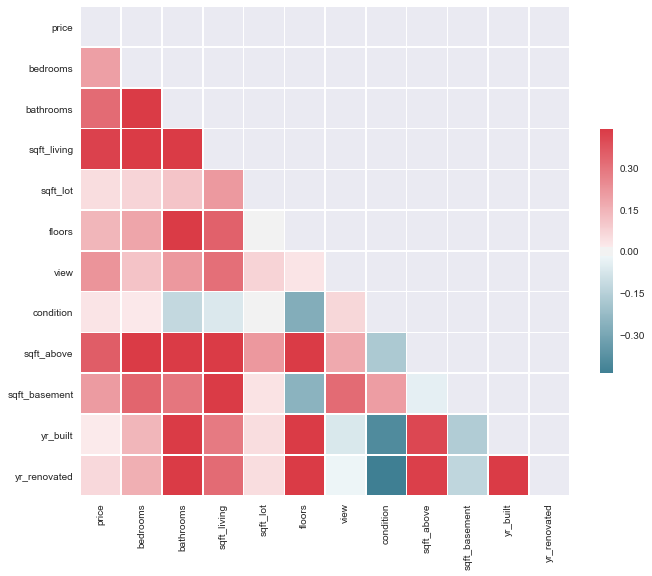

In [71]:
# code adapted from 
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html
d = result2.drop(labels=['street','statezip','city','country','date','waterfront'],axis=1)
d
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Since  bedrooms, bathrooms, and sqft_living, sqft_above, view have highest correlation with price and sqft_above has high correlation with sqft_living therefore we will use bedrooms, bathrooms, and sqft_living, view to perform linear regression to predict price.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
# creating features data structure 
feature_cols = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','view']
# creating a copy incase we need the original dataframe later
result2dropna_copy = result2_dropna[feature_cols].copy()
result2dropna_copy.shape

C:\Users\ssj4v\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(4352, 5)

In [73]:
#checking data
result2dropna_copy.head(5)

bedrooms  bathrooms  sqft_living  sqft_lot  view
0       3.0       1.50         1340      7912     0
1       5.0       2.50         3650      9050     4
2       3.0       2.00         1930     11947     0
3       3.0       2.25         2000      8030     0
4       4.0       2.50         1940     10500     0

To do this we will first randomly create a training set and a test set of data without missing price in the ratio 80:20 so that we can test our model for observed values. Then we will calculate score of our linear model using the test data set. We will be taking log of the price due to presence of extreme values in it.

In [74]:
# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(result2dropna_copy,
                                                    np.log(result2_dropna[['price']]),test_size=0.20, random_state = 1)

lm_for_impute = LinearRegression() #instatiate
lm_for_impute.fit(x_train,y_train) #fit model
print 'r-squared for this model = ',lm_for_impute.score(x_test,y_test) # check score

r-squared for this model =  0.452122272102


Now we will use this model to impute the missing values.

In [75]:
# getting index of missing rows
idximpute = result2['price']==0
# using predicted values to impute missing prices
result2.loc[idximpute,'price'] = np.exp(lm_for_impute.predict(result2[result2['price']==0][['bedrooms','bathrooms', 'sqft_living','sqft_lot','view']]))
# rounding them to 2 digits
result2.loc[4353:4600,'price'] = result2.loc[4353:4600,'price'].round(2)
# take a look
result2[4353:4600]

date       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4354 2014-05-05   257835.16       3.0       1.00         1340    306848   
4355 2014-05-05   372447.70       3.0       1.75         1490     10125   
4356 2014-05-05   595018.59       4.0       2.50         2800      5900   
4357 2014-05-05   565084.03       4.0       2.75         2600      5390   
4358 2014-05-05   763220.01       6.0       2.75         3200      9200   
4359 2014-05-06   752955.05       5.0       3.50         3480     36615   
4360 2014-05-06   723491.06       3.0       3.50         3020      4082   
4361 2014-05-06   455956.90       3.0       2.25         1970     11088   
4362 2014-05-07   335796.14       5.0       1.50         1500      7112   
4363 2014-05-07   889895.18       4.0       4.00         3680     18804   
4364 2014-05-07   390874.09       3.0       2.00         1570      7200   
4365 2014-05-07   521229.17       3.0       2.50         2280      2289   
4366 2014-05-07   410593.90       3.0       2.50         1600      3573   
4367 2014-05-07   438276.06       3.0       3.00         1680      1570   
4368 2014-05-08   426867.94       3.0       1.75         1890     13860   
4369 2014-05-08   260674.91       2.0       1.00          520     22334   
4370 2014-05-08   438489.56       3.0       2.25         1780    191228   
4371 2014-05-08   829507.92       4.0       3.00         2920     33976   
4372 2014-05-08   506846.56       3.0       2.25         2430     73151   
4373 2014-05-08   684894.76       3.0       2.75         3010      1842   
4374 2014-05-09   362845.43       3.0       1.00         1620     30736   
4375 2014-05-09   595634.91       2.0       2.50         2200    188200   
4376 2014-05-09   604717.21       3.0       2.25         2950     78843   
4377 2014-05-09   562935.81       4.0       2.25         2170     10500   
4378 2014-05-12   400953.11       3.0       1.50         1770     17208   
4379 2014-05-12   398299.77       3.0       1.00         1830      8209   
4380 2014-05-12   513321.22       4.0       2.50         2380      7066   
4381 2014-05-12   543306.19       4.0       2.50         2550     10000   
4382 2014-05-12   854737.44       3.0       2.50         3720     11610   
4383 2014-05-12  1240676.25       5.0       4.50         4630      6324   
4384 2014-05-13  1113952.70       5.0       4.00         4430      9000   
4385 2014-05-13   395772.62       3.0       2.50         1490      1709   
4386 2014-05-13  1792423.04       4.0       4.50         5030     11023   
4387 2014-05-13   439670.04       4.0       1.50         2180     22870   
4388 2014-05-14   429921.10       4.0       1.50         1590    131551   
4389 2014-05-15   461254.33       3.0       2.00         1510      7066   
4390 2014-05-15  1041211.67       4.0       3.50         4210     10308   
4391 2014-05-15   399566.64       3.0       2.00         1640      9972   
4392 2014-05-15   427177.36       4.0       2.50         1840      1562   
4393 2014-05-15   303134.65       3.0       1.00         1040      5000   
4394 2014-05-16   326256.61       3.0       1.00         1250      4800   
4395 2014-05-16   813215.49       5.0       3.25         3690     12353   
4396 2014-05-16   342869.68       4.0       1.00         1530      7200   
4397 2014-05-16   468505.91       4.0       2.50         2110      3750   
4398 2014-05-16   471387.16       3.0       1.75         2150      4333   
4399 2014-05-19  1985844.60       5.0       3.75         5340     10655   
4400 2014-05-19   493254.20       4.0       1.75         2420      7672   
4401 2014-05-19  1323972.36       4.0       3.25         5010     34460   
4402 2014-05-19   302081.32       2.0       1.00          910      9612   
4403 2014-05-19   470963.40       3.0       1.50         2200      5000   
4404 2014-05-19   704068.98       4.0       2.50         3430     64441   
4405 2014-05-20   428228.25       4.0       2.50         1860      6687   
4406 2014-05-20  1125553.03       4.

## Outlier detection
To detect outlier let us first try to spot outliers visually using boxplot and pairwise scatter plot and then we can try to vet them.

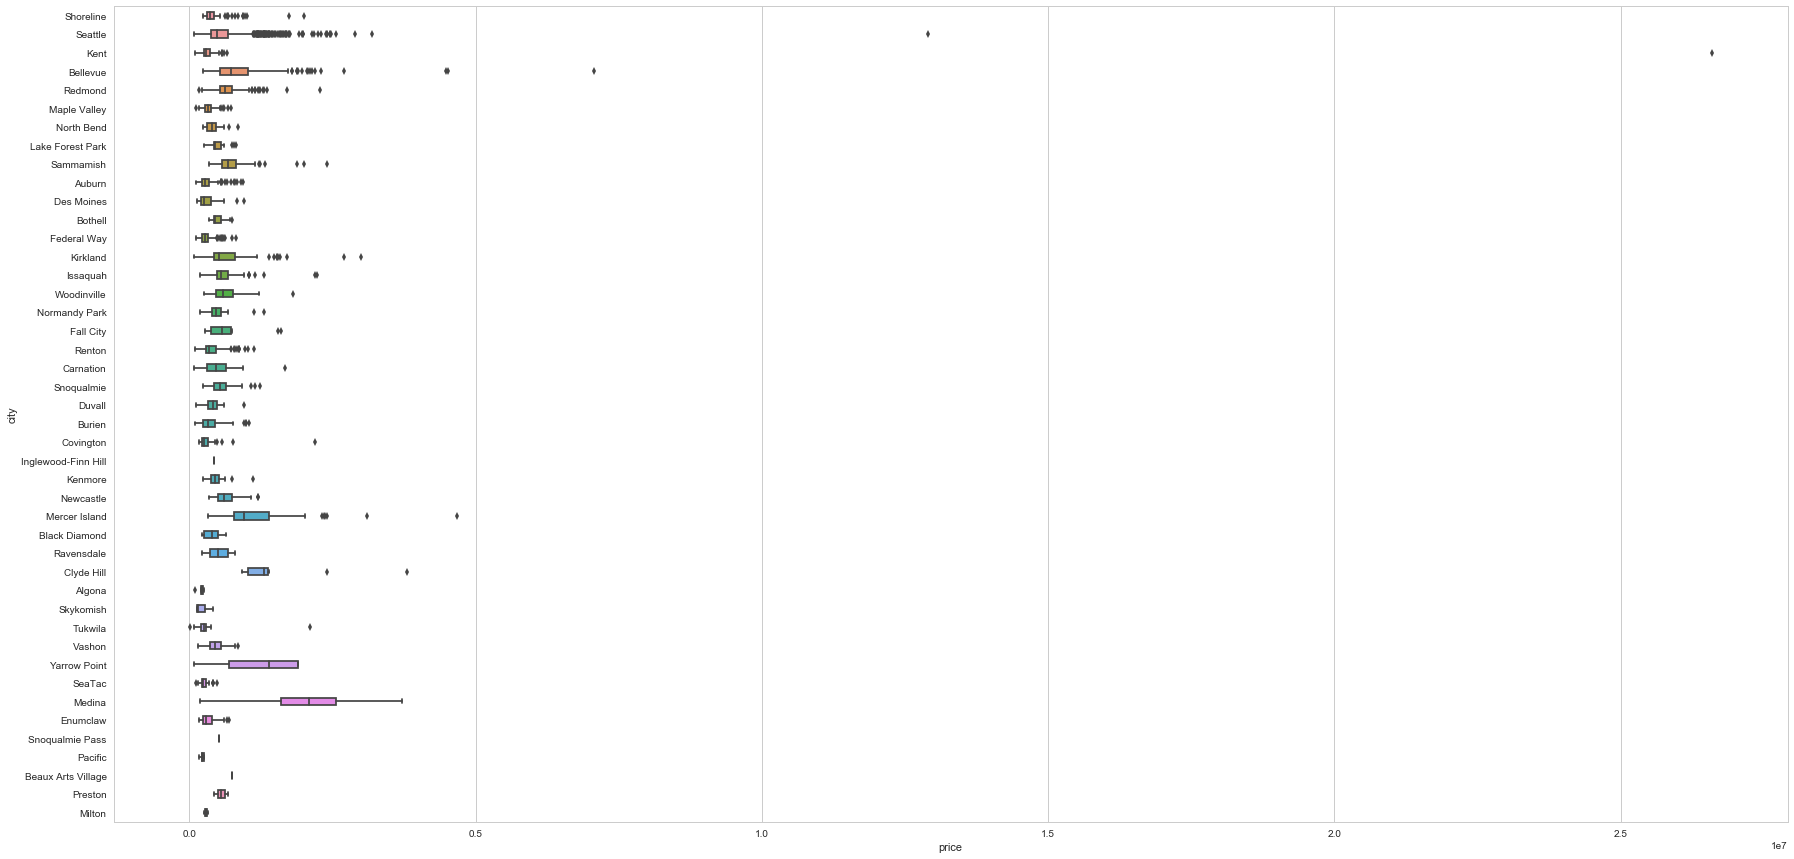

In [76]:
# choosing theme
sns.set_style("whitegrid")
# setting size of plot
sns.plt.figure(figsize=(30,15))
sns.boxplot(y='city', x="price", data=result2, width=0.4 )
sns.plt.show()

We can notice many potential outliers based on how far they are from the next price lower than them for the same city and how many such points exist. If there are multiple occurance of high priced properties in particular city then having an abnormally high price may not be an outlier. Following points are potential outliers:
- Seattle has one potential outlier with price > 10,000,000
- Kent has one potential outlier with price > 25,000,000
- Tukwila has one potential outlier because the spread of the price in city of tukwila 
- Covington has one potential outlier



Let us take a look at the scatterplot and histogram combined to have better idea of more outliers.

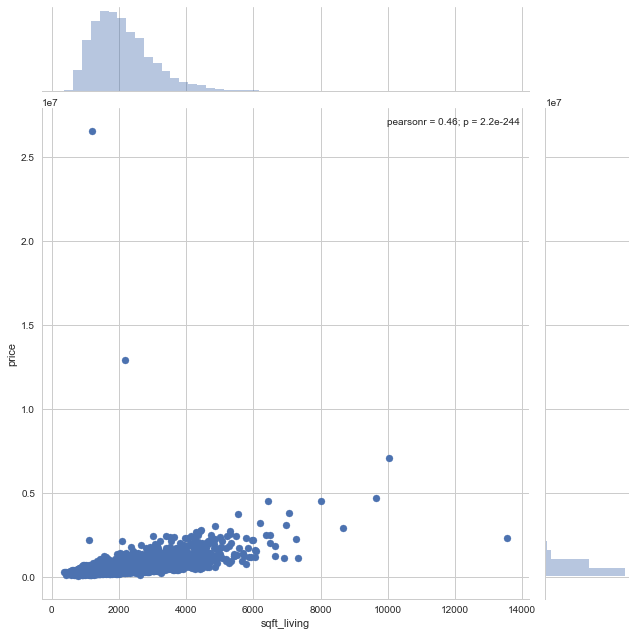

In [77]:
ax = sns.jointplot(x="sqft_living", y="price", data=result2, size = 9)
sns.plt.show()

In this bivariate joint plot we can see the distribution of both variables as well as their joint plot. We can notice that there are some values which deviate a lot from majority  which is evident by comparing their location with the attached histogram.
- 2 points with price above 10,000,000
- 5 point with sqft_living above 8,000
All 7 of these point are far away from the cluster and should be checked for validity.

Also by looking at the histogram with rugplot enabled, we may be able to spot more outliers. Since the extremely high values are preventing us from looking at lower values we will filter the prices to look at the lower value distribution.

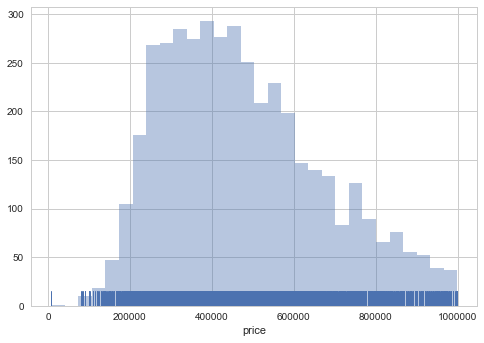

In [78]:
sns.distplot(result2[result2['price']<1000000]['price'], kde=False, rug=True);
plt.show()

Let us look at even lower range of values 

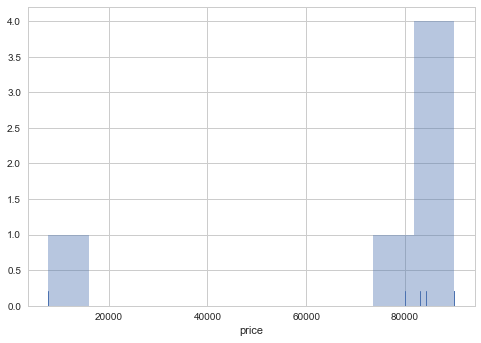

In [79]:
sns.distplot(result2[result2['price']<100000]['price'], kde=False, rug=True);
plt.show()

The one data point below 20000 price surely identifies as an outlier. Since there are multiple properties around price of 80000 so we will not consider them as outlier.

### Vetting outliers
We will now look at the above identified outliers in an attempt to validate or invalidate them.

In [80]:
# using above identified rangees to narrow down on the outliers
result2[(result2['price']<20000) | (result2['price']> 10000000) | (result2['sqft_living']> 8000)].sort_values('sqft_living')

date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4352 2014-05-06      7800.00       2.0       1.00          780     16344   
4351 2014-07-03  26590000.00       3.0       2.00         1180      7793   
4347 2014-06-23  12899000.00       3.0       2.50         2190     11394   
4576 2014-07-02   4527609.99       5.0       6.25         8020     21738   
2328 2014-06-11   2888000.00       5.0       6.25         8670     64033   
2654 2014-06-17   4668000.00       5.0       6.75         9640     13068   
2286 2014-06-11   7062500.00       5.0       4.50        10040     37325   
122  2014-05-05   2280000.00       7.0       8.00        13540    307752   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4352     1.0           0     0          1         780              0   
4351     1.0           0     0          4        1180              0   
4347     1.0           0     0          3        1550            640   
4576     2.0           0     0          3        8020              0   
2328     2.0           0     4          3        6120           2550   
2654     1.0           1     4          3        4820           4820   
2286     2.0           1     2          3        7680           2360   
122      3.0           0     4          3        9410           4130   

      yr_built  yr_renovated               street           city  statezip  \
4352      1942          1942      4229 S 144th St        Tukwila  WA 98168   
4351      1992          1992    12005 SE 219th Ct           Kent  WA 98031   
4347      1956          1956      5426 40th Ave W        Seattle  WA 98199   
4576      2001          2001       2 Crescent Key       Bellevue  WA 98006   
2328      1965          2003    1291 NW Elford Dr        Seattle  WA 98177   
2654      1983          2009  5044 Butterworth Rd  Mercer Island  WA 98040   
2286      1940          2001     4442 95th Ave NE       Bellevue  WA 98004   
122       1999          1999     26408 NE 70th St        Redmond  WA 98053   

     country  
4352     USA  
4351     USA  
4347     USA  
4576     USA  
2328     USA  
2654     USA  
2286     USA  
122      USA

#### Vetting property with price of 7800
Lets look at all properties in washington with sqft_living less than 800 to get an idea of the prices.

In [81]:
result2[(result2['sqft_living']<800)]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
158  2014-05-06  329350.00       2.0       1.00          720      6687   
281  2014-05-07  300000.00       2.0       1.00          760      3001   
328  2014-05-08  205000.00       2.0       1.00          720      5040   
405  2014-05-09  195000.00       2.0       1.00          720     18000   
522  2014-05-12  192000.00       2.0       1.00          700     10540   
586  2014-05-13  230000.00       2.0       0.75          650      5360   
588  2014-05-13   90000.00       2.0       1.00          790      2640   
638  2014-05-14  155000.00       2.0       1.00          700      5200   
684  2014-05-14  267800.00       2.0       1.00          700      6000   
784  2014-05-16  350000.00       1.0       1.00          700      5100   
882  2014-05-19  413500.00       2.0       1.00          770      4000   
908  2014-05-19  110700.00       2.0       1.00          680      8064   
920  2014-05-19  367000.00       2.0       1.00          700      2334   
981  2014-05-20  268500.00       2.0       1.00          790      8424   
988  2014-05-20  315000.00       2.0       1.00          790      6969   
1081 2014-05-21  299800.00       2.0       1.00          790      5240   
1164 2014-05-22  235750.00       2.0       1.00          740     11250   
1191 2014-05-22  398000.00       2.0       1.00          590     10945   
1216 2014-05-22  353000.00       1.0       1.00          550      1279   
1219 2014-05-23   80000.00       1.0       0.75          430      5050   
1230 2014-05-23  306000.00       2.0       1.00          780     13500   
1283 2014-05-23   90000.00       2.0       1.00          580      7500   
1298 2014-05-23  375000.00       2.0       2.50          750      1430   
1307 2014-05-24  199000.00       2.0       1.00          720      7200   
1497 2014-05-28  157500.00       2.0       1.00          740      9003   
1566 2014-05-29  402000.00       2.0       1.00          710      1173   
1663 2014-06-01  250000.00       1.0       1.00          750      4000   
1678 2014-06-02  395000.00       1.0       1.00          730      3000   
1775 2014-06-03  235000.00       2.0       1.00          720      4840   
1833 2014-06-04  299000.00       1.0       0.75          560     12120   
1853 2014-06-04  135000.00       1.0       1.00          790     13062   
1861 2014-06-04  175000.00       2.0       1.00          670      2378   
1877 2014-06-04  275000.00       2.0       1.00          770      8149   
1906 2014-06-04  129000.00       1.0       1.00          650     15364   
2054 2014-06-06  285000.00       2.0       1.00          780      5000   
2107 2014-06-09  378500.00       2.0       1.00          730      7528   
2112 2014-06-09  304700.00       2.0       1.00          740      5995   
2150 2014-06-09  403950.00       2.0       1.00          710      1136   
2271 2014-06-10  399950.00       2.0       1.00          710      1157   
2295 2014-06-11  200000.00       2.0       1.00          700      4700   
2303 2014-06-11  355000.00       1.0       1.75          750     20339   
2318 2014-06-11  148000.00       1.0       1.00          620      8261   
2336 2014-06-11  333000.00       2.0       1.00          720      6686   
2350 2014-06-11  399950.00       2.0       1.00          710      1131   
2416 2014-06-12  280000.00       1.0       0.75          420      6720   
2477 2014-06-13  215000.00       2.0       1.00          710      7200   
2653 2014-06-17  342000.00       2.0       1.00          740      6180   
2733 2014-06-18  250275.00       2.0       1.00          790     11234   
2765 2014-06-18  190000.00       1.0       1.00          720      4800   
2770 2014-06-18  175000.00       2.0       1.00          660      5000   
2783 2014-06-18  240000.00       2.0       1.00          670     10920   
2875 2014-06-19  436000.00       2.0       1.00          790      6600   
2919 2014-06-20  245000.00       1.0       0.75          380     15000   
3129 2014-06-23

We can make following observation:
- <b>4229 S 144th St Tukwila</b> : This data record is quite likely an erroneous record. Price for property defies current property trend for similar square footage of living space. Even though we have only 1 record from Tukwila in this square footage range judging from overall data this price is still highly unlikely.  
- similarly as observed from the histograms <b>12005 SE 219th Ct Kent WA 98031 and 5426 40th Ave W Seattle</b> are quite likely erroneous records as well due to their extremely high price with relatively low corresponding square footage.
<br>
A quick google search confirms all of the above conclusions that these 3 entries are invalid with respect to their prices.
<br>
The other 6 entries however could possibly be valid outliers as they all have quite high sqft_lot to accomodate very high sqft_living space.

Hence it is recommended to remove those 3 properties for better analysis.

In [82]:
# check outliers have one row only for their street address
result2[(result['street'] =='4229 S 144th St') | (result['street'] =='12005 SE 219th Ct') | (result['street'] =='5426 40th Ave W')]

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4347 2014-06-23  12899000.0       3.0        2.5         2190     11394   
4351 2014-07-03  26590000.0       3.0        2.0         1180      7793   
4352 2014-05-06      7800.0       2.0        1.0          780     16344   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4347     1.0           0     0          3        1550            640   
4351     1.0           0     0          4        1180              0   
4352     1.0           0     0          1         780              0   

      yr_built  yr_renovated             street     city  statezip country  
4347      1956          1956    5426 40th Ave W  Seattle  WA 98199     USA  
4351      1992          1992  12005 SE 219th Ct     Kent  WA 98031     USA  
4352      1942          1942    4229 S 144th St  Tukwila  WA 98168     USA

In [83]:
# remove invalidated outliers
output = result2.drop(result2[(result2['street'] =='4229 S 144th St') | (result2['street'] =='12005 SE 219th Ct') | (result2['street'] =='5426 40th Ave W')].index)
# checking if output has the invalidated outleirs or not
output[(result2['street'] =='4229 S 144th St') | (result2['street'] =='12005 SE 219th Ct') | (result2['street'] =='5426 40th Ave W')]

C:\Users\ssj4v\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

In [84]:
#checking output has proper data
output.shape

(4597, 18)

In [85]:
#checking output has proper columns
output.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0       3.0       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0       5.0       2.50         3650      9050     2.0   
2 2014-05-02   342000.0       3.0       2.00         1930     11947     1.0   
3 2014-05-02   420000.0       3.0       2.25         2000      8030     1.0   
4 2014-05-02   550000.0       4.0       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          1955      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1          1921           709 W Blaine St    Seattle  WA 98119     USA  
2          1966  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3          1963           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1976         9105 170th Ave NE    Redmond  WA 98052     USA

In [86]:
#checking output tail
output.tail()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4596 2014-07-09  376307.27       3.0       1.75         1510      6360   
4597 2014-07-09  389624.93       3.0       2.50         1460      7573   
4598 2014-07-09  669765.09       3.0       2.50         3010      7014   
4599 2014-07-10  447860.27       4.0       2.00         2090      6630   
4600 2014-07-10  393544.09       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4596     1.0           0     0          4        1510              0   
4597     2.0           0     0          3        1460              0   
4598     2.0           0     0          3        3010              0   
4599     1.0           0     0          3        1070           1020   
4600     2.0           0     0          4        1490              0   

      yr_built  yr_renovated             street       city  statezip country  
4596      1954          1954     501 N 143rd St    Seattle  WA 98133     USA  
4597      1983          1983   14855 SE 10th Pl   Bellevue  WA 98007     USA  
4598      2009          2009   759 Ilwaco Pl NE     Renton  WA 98059     USA  
4599      1974          1974  5148 S Creston St    Seattle  WA 98178     USA  
4600      1990          1990  18717 SE 258th St  Covington  WA 98042     USA

In [87]:
# since there are only 4597 rows and the last index is 4600 , we should reset index of the rows to prevent any issues in future.
output = output.reset_index(drop=True)
output.tail()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4592 2014-07-09  376307.27       3.0       1.75         1510      6360   
4593 2014-07-09  389624.93       3.0       2.50         1460      7573   
4594 2014-07-09  669765.09       3.0       2.50         3010      7014   
4595 2014-07-10  447860.27       4.0       2.00         2090      6630   
4596 2014-07-10  393544.09       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4592     1.0           0     0          4        1510              0   
4593     2.0           0     0          3        1460              0   
4594     2.0           0     0          3        3010              0   
4595     1.0           0     0          3        1070           1020   
4596     2.0           0     0          4        1490              0   

      yr_built  yr_renovated             street       city  statezip country  
4592      1954          1954     501 N 143rd St    Seattle  WA 98133     USA  
4593      1983          1983   14855 SE 10th Pl   Bellevue  WA 98007     USA  
4594      2009          2009   759 Ilwaco Pl NE     Renton  WA 98059     USA  
4595      1974          1974  5148 S Creston St    Seattle  WA 98178     USA  
4596      1990          1990  18717 SE 258th St  Covington  WA 98042     USA

Now we will extract the cleansed data into a csv file for analysis.

In [88]:
# Extracting to csv
output.to_csv("cleaned_data.csv")

# Summary
Several Issues were discovered during our data extraction, auditing, and cleansing.
- Date time of sale records issues while extraction
- missing bathrooms records
- missing bedroom records
- yr_built > yr_renovation issue records
- completely duplicate record with same date of sale
- duplicate record with varying variable data but same date of sale
- City names having case differences, typos related inconsistencies
- anomalous records with same street address but different date of sale:
    - year of built date differs among different records of same property (same street address)
    - year of renovation is missing among different records of same property (same street address) most of which have different year of built
    - square footage of plot differs greatly among different records of same property (same street address)
    - extreme variation in price among different records of same property (same street address)
- anamolous square footage of living space constraint violation as sum of square footage above and basement
- float year of renovation
- missing year of renovation
- non-standard bathrooms values
- 8 outliers detected out of which 3 were concluded to be invalid
